# Eigenmode extraction and EPR analysis
### Prerequisite
You need to have a working local installation of Ansys

## Sections
### I. Transmon only: render into Ansys.
1. Run finite element eigenmode analysis. <br>
1. Plot fields and display them. <br>
1. Set up EPR junction dictionary. <br>
1. Run EPR analysis on single mode. <br>
1. Get qubit freq and anharmonicity. <br>
1. Calculate EPR of substrate.  <br>
1. (Extra: Calculate surface EPR.) <br>

### II. Resonator only: render into Ansys.
1. Run finite element eigenmode analysis. <br>
1. Plot fields and display them. <br>
1. Calculate EPR of substrate. <br>
    
### III. Transmon & resonator: render into Ansys.
1. Run finite element eigenmode analysis. <br>
1. Plot fields and display them. <br>
1. Set up EPR junction dictionary. <br>
1. Run EPR analysis on the two modes. <br>
1. Get qubit frequency and anharmonicity. <br>

### IV. Analyze a coupled 2 transmon system. 
1. Finite Element Eigenmode Analysis
1. Identify the mode you want. The mode can inclusively be from 1 to setup.n_modes.
1. Set variables in the Ansys design. As before, we seek 2 modes.
1. Set up the simulation and specify the variables for the sweep.
1. Plot the E-field on the chip's surface.
1. Specify the junctions in the model; in this case there are 2 junctions.
1. Find the electric and magnetic energy stored in the substrate and the system as a whole.
1. Perform EPR analysis for all modes and variations.

In [1]:
%load_ext autoreload
%autoreload 2

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
import pyEPR as epr

In [2]:
%metal_heading Tutorial 1: Create a single transmon qubit and analyze it using pyEPR.

In [3]:
%metal_print Part 1. Finite Element Eigenmode Analysis

### Create the design in Metal
Setup a design of a given dimension. Dimensions will be respected in the design rendering. <br>
Note that the design size extends from the origin into the first quadrant.

In [4]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '2mm'
design.chips.main.size['size_y'] = '2mm'
hfss = design.renderers.hfss

gui = MetalGUI(design)

Create a single transmon with one readout resonator and move it to the center of the chip previously defined.

In [5]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

design.delete_all_components()

q1 = TransmonPocket(design, 'Q1', options = dict(
    pad_width = '425 um', 
    pocket_height = '650um',
    connection_pads=dict(
        readout = dict(loc_W=+1,loc_H=+1, pad_width='200um')
    )))

gui.rebuild()
gui.autoscale()

### Establish a connection between Metal and Ansys
First you will need to open Ansys. <br>
You can either open Ansys manually, or by executing one of the lines in the following cell. <br>
open_ansys() will look by default for the 2020 R2 version of Ansys. You can easily reroute it to your Ansys of choice by providing the name of the environment variable that contains the path (path_env) or the path itself (path)

In [6]:
hfss.open_ansys()   # this opens Ansys 2020 R2 if present
# hfss.open_ansys(path_var='ANSYSEM_ROOT211')
# hfss.open_ansys(path='C:\Program Files\AnsysEM\AnsysEM20.2\Win64')
# hfss.open_ansys(path='../../../Program Files/AnsysEM/AnsysEM20.2/Win64')

If a project was not automatically opened, you can manually create/open one from the Ansys GUI. Alternatively you can execute the following cell.

In [7]:
# hfss.new_ansys_project()

Finally connect this Jupyter Notebook session with the active Ansys project.

In [8]:
hfss.connect_ansys()
# hfss.connect_ansys('C:\\project_path\\', 'Project1')  # will open a saved project before linking the Jupyter session

INFO 01:15PM [connect_project]: Connecting to Ansys Desktop API...
INFO 01:15PM [load_ansys_project]: 	Opened Ansys App
INFO 01:15PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 01:15PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Ansoft/
	Project:   Project16
INFO 01:15PM [connect_design]: No active design found (or error getting active design).
INFO 01:15PM [connect]: 	 Connected to project "Project16". No design detected


### Prepare and run the analysis

Create and activate an eigenmode design called "TransmonQubit".

In [9]:
hfss.activate_eigenmode_design("TransmonQubit")

01:15PM 05s WARNING [activate_eigenmode_design]: The name=TransmonQubit was not in active project.  A new design will be inserted to the project.  Names in active project are: 
[].  
INFO 01:15PM [connect_design]: 	Opened active design
	Design:    TransmonQubit [Solution type: Eigenmode]
WARNING 01:15PM [connect_setup]: 	No design setup detected.
WARNING 01:15PM [connect_setup]: 	Creating eigenmode default setup.
INFO 01:15PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


Render the single qubit in Metal, called Q1, to "TransmonQubit" design in Ansys.

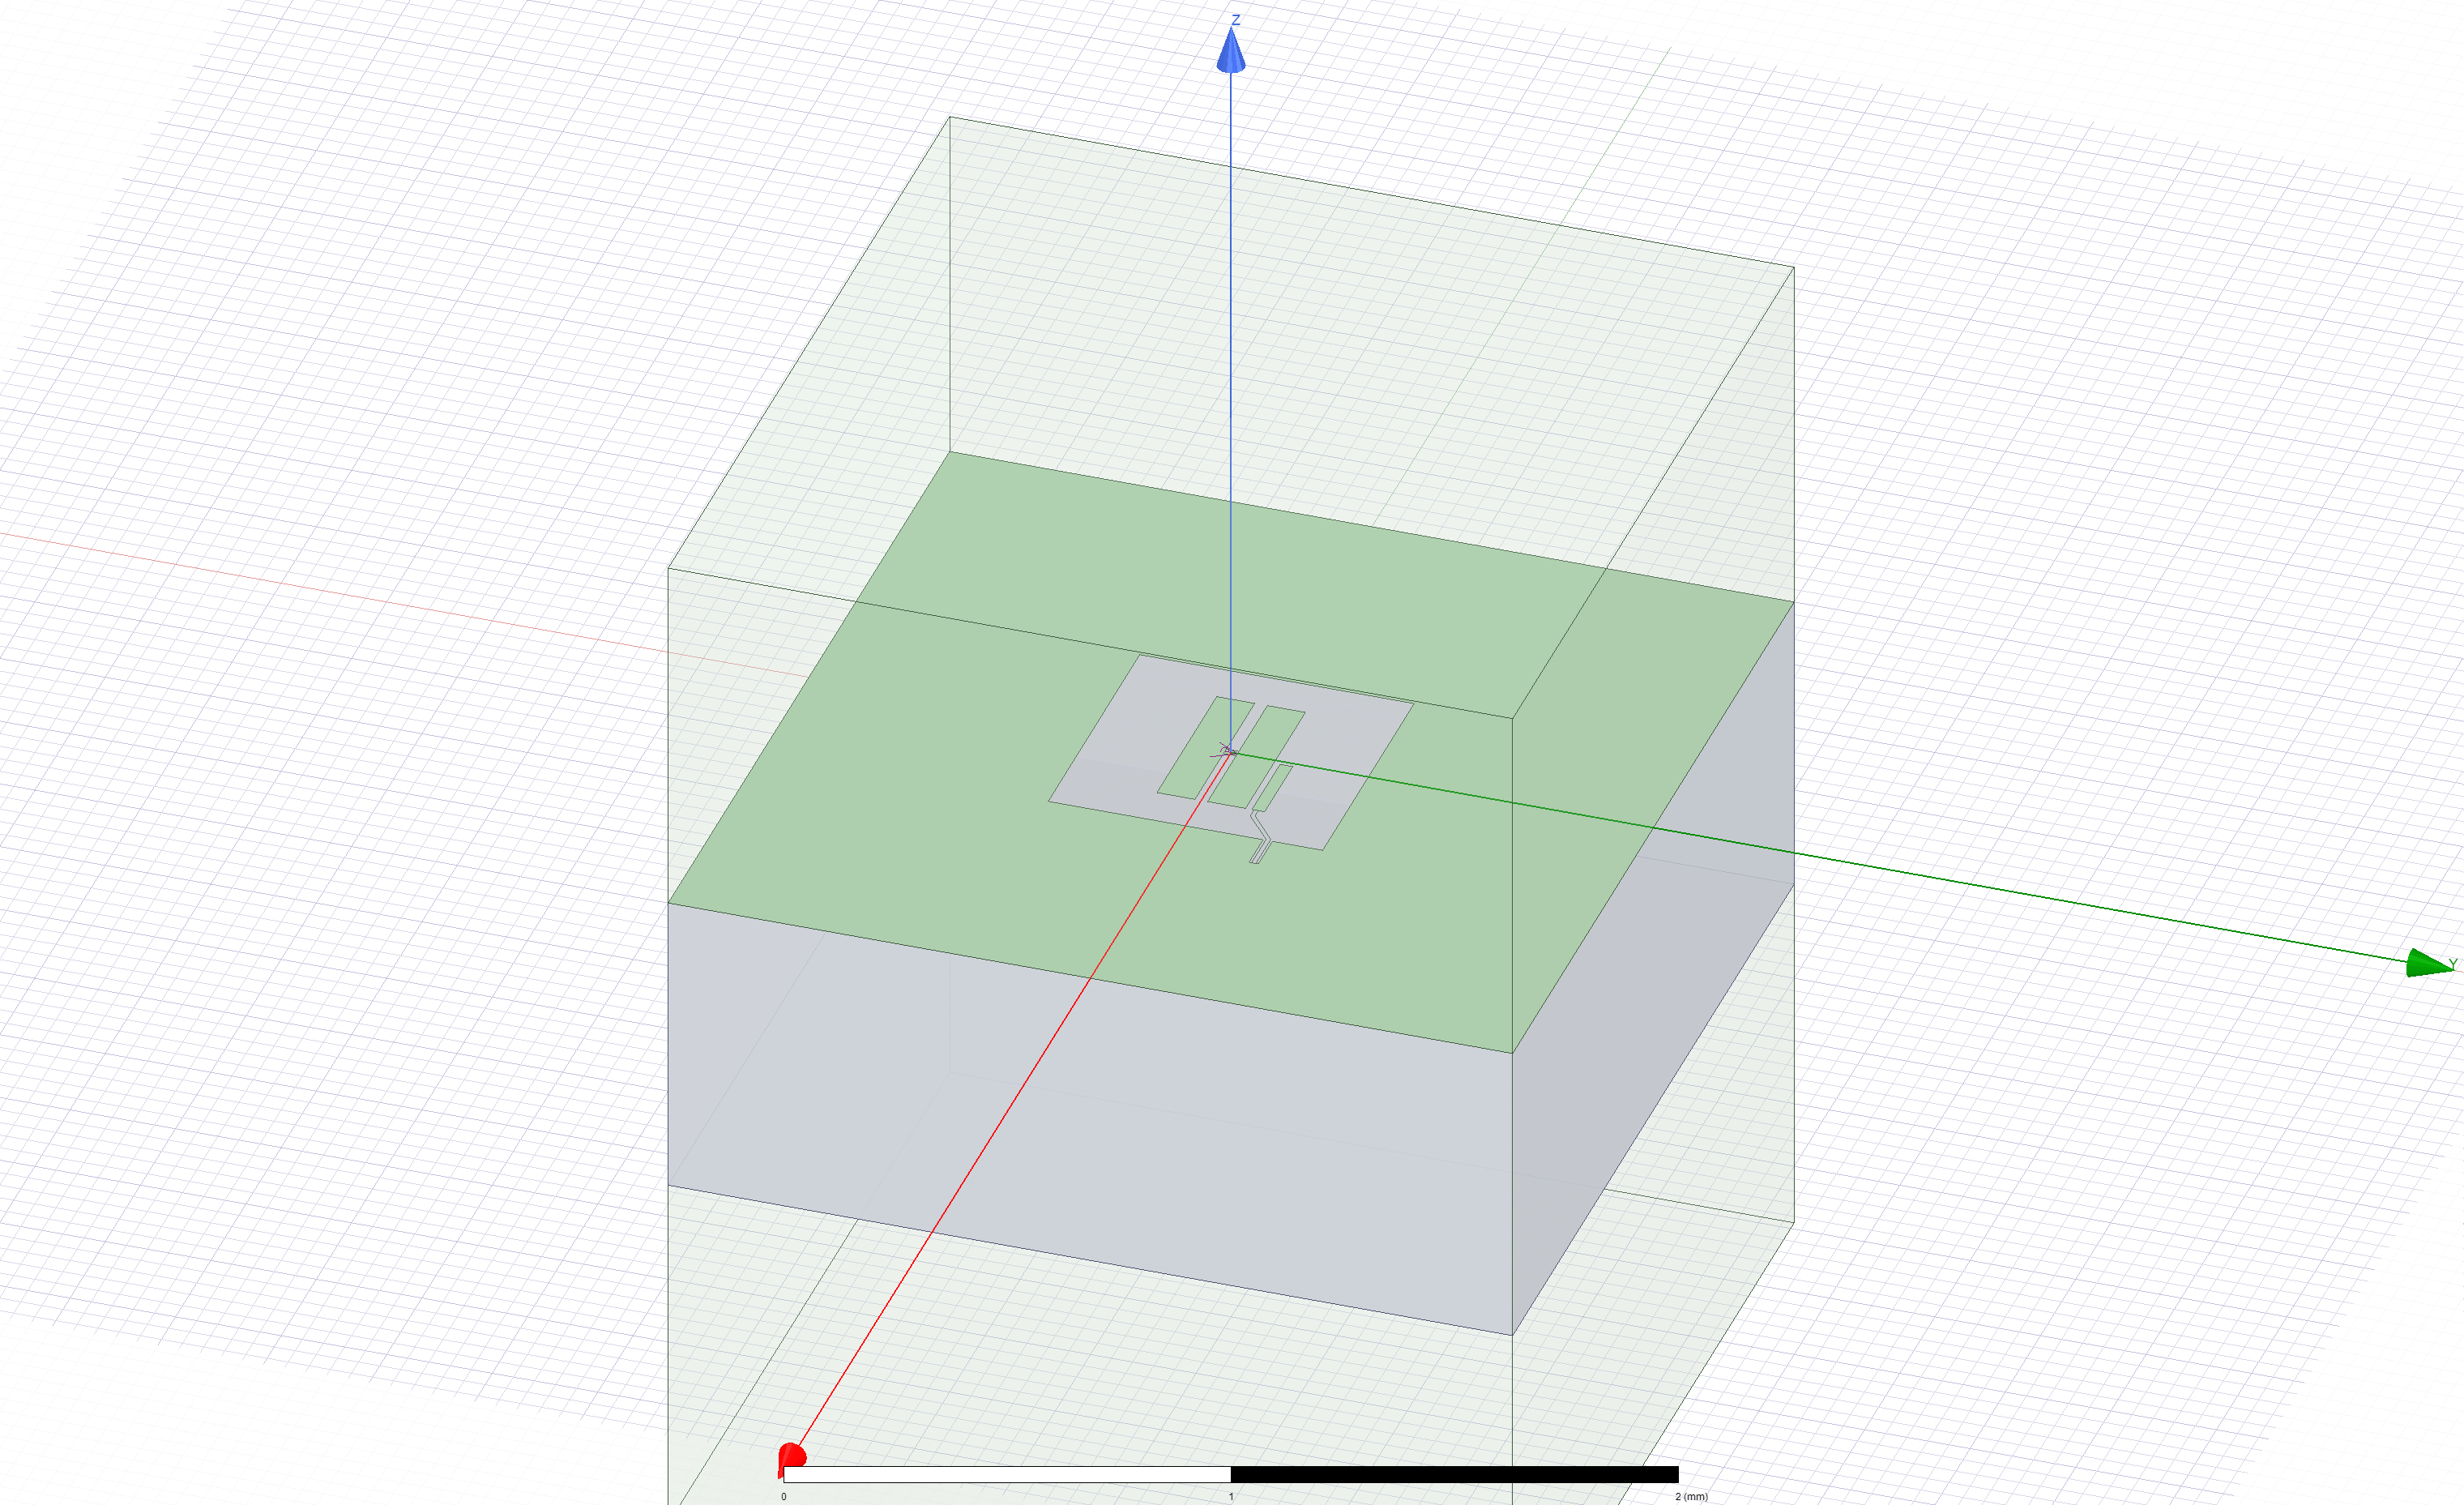

WindowsPath('C:/workspace/qiskit-metal/docs/tut/4 Analysis/ansys.png')

In [10]:
hfss.render_design(['Q1'], box_plus_buffer=False)
hfss.save_screenshot()

Set the convergence parameters and junction properties in the Ansys design. <br>
Then run the analysis and plot the convergence.

In [11]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 10
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
pinfo.design.set_variable('Lj', '10 nH')
pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 01:15PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 10
Convergence freq max delta percent diff  = 0.1



01:16PM 24s INFO [hfss_report_f_convergence]: Saved convergences to C:\workspace\qiskit-metal\docs\tut\4 Analysis\hfss_eig_f_convergence.csv


### Plot fields and display them
Display the Ansys modeler window and plot the E-field on the chip's surface.

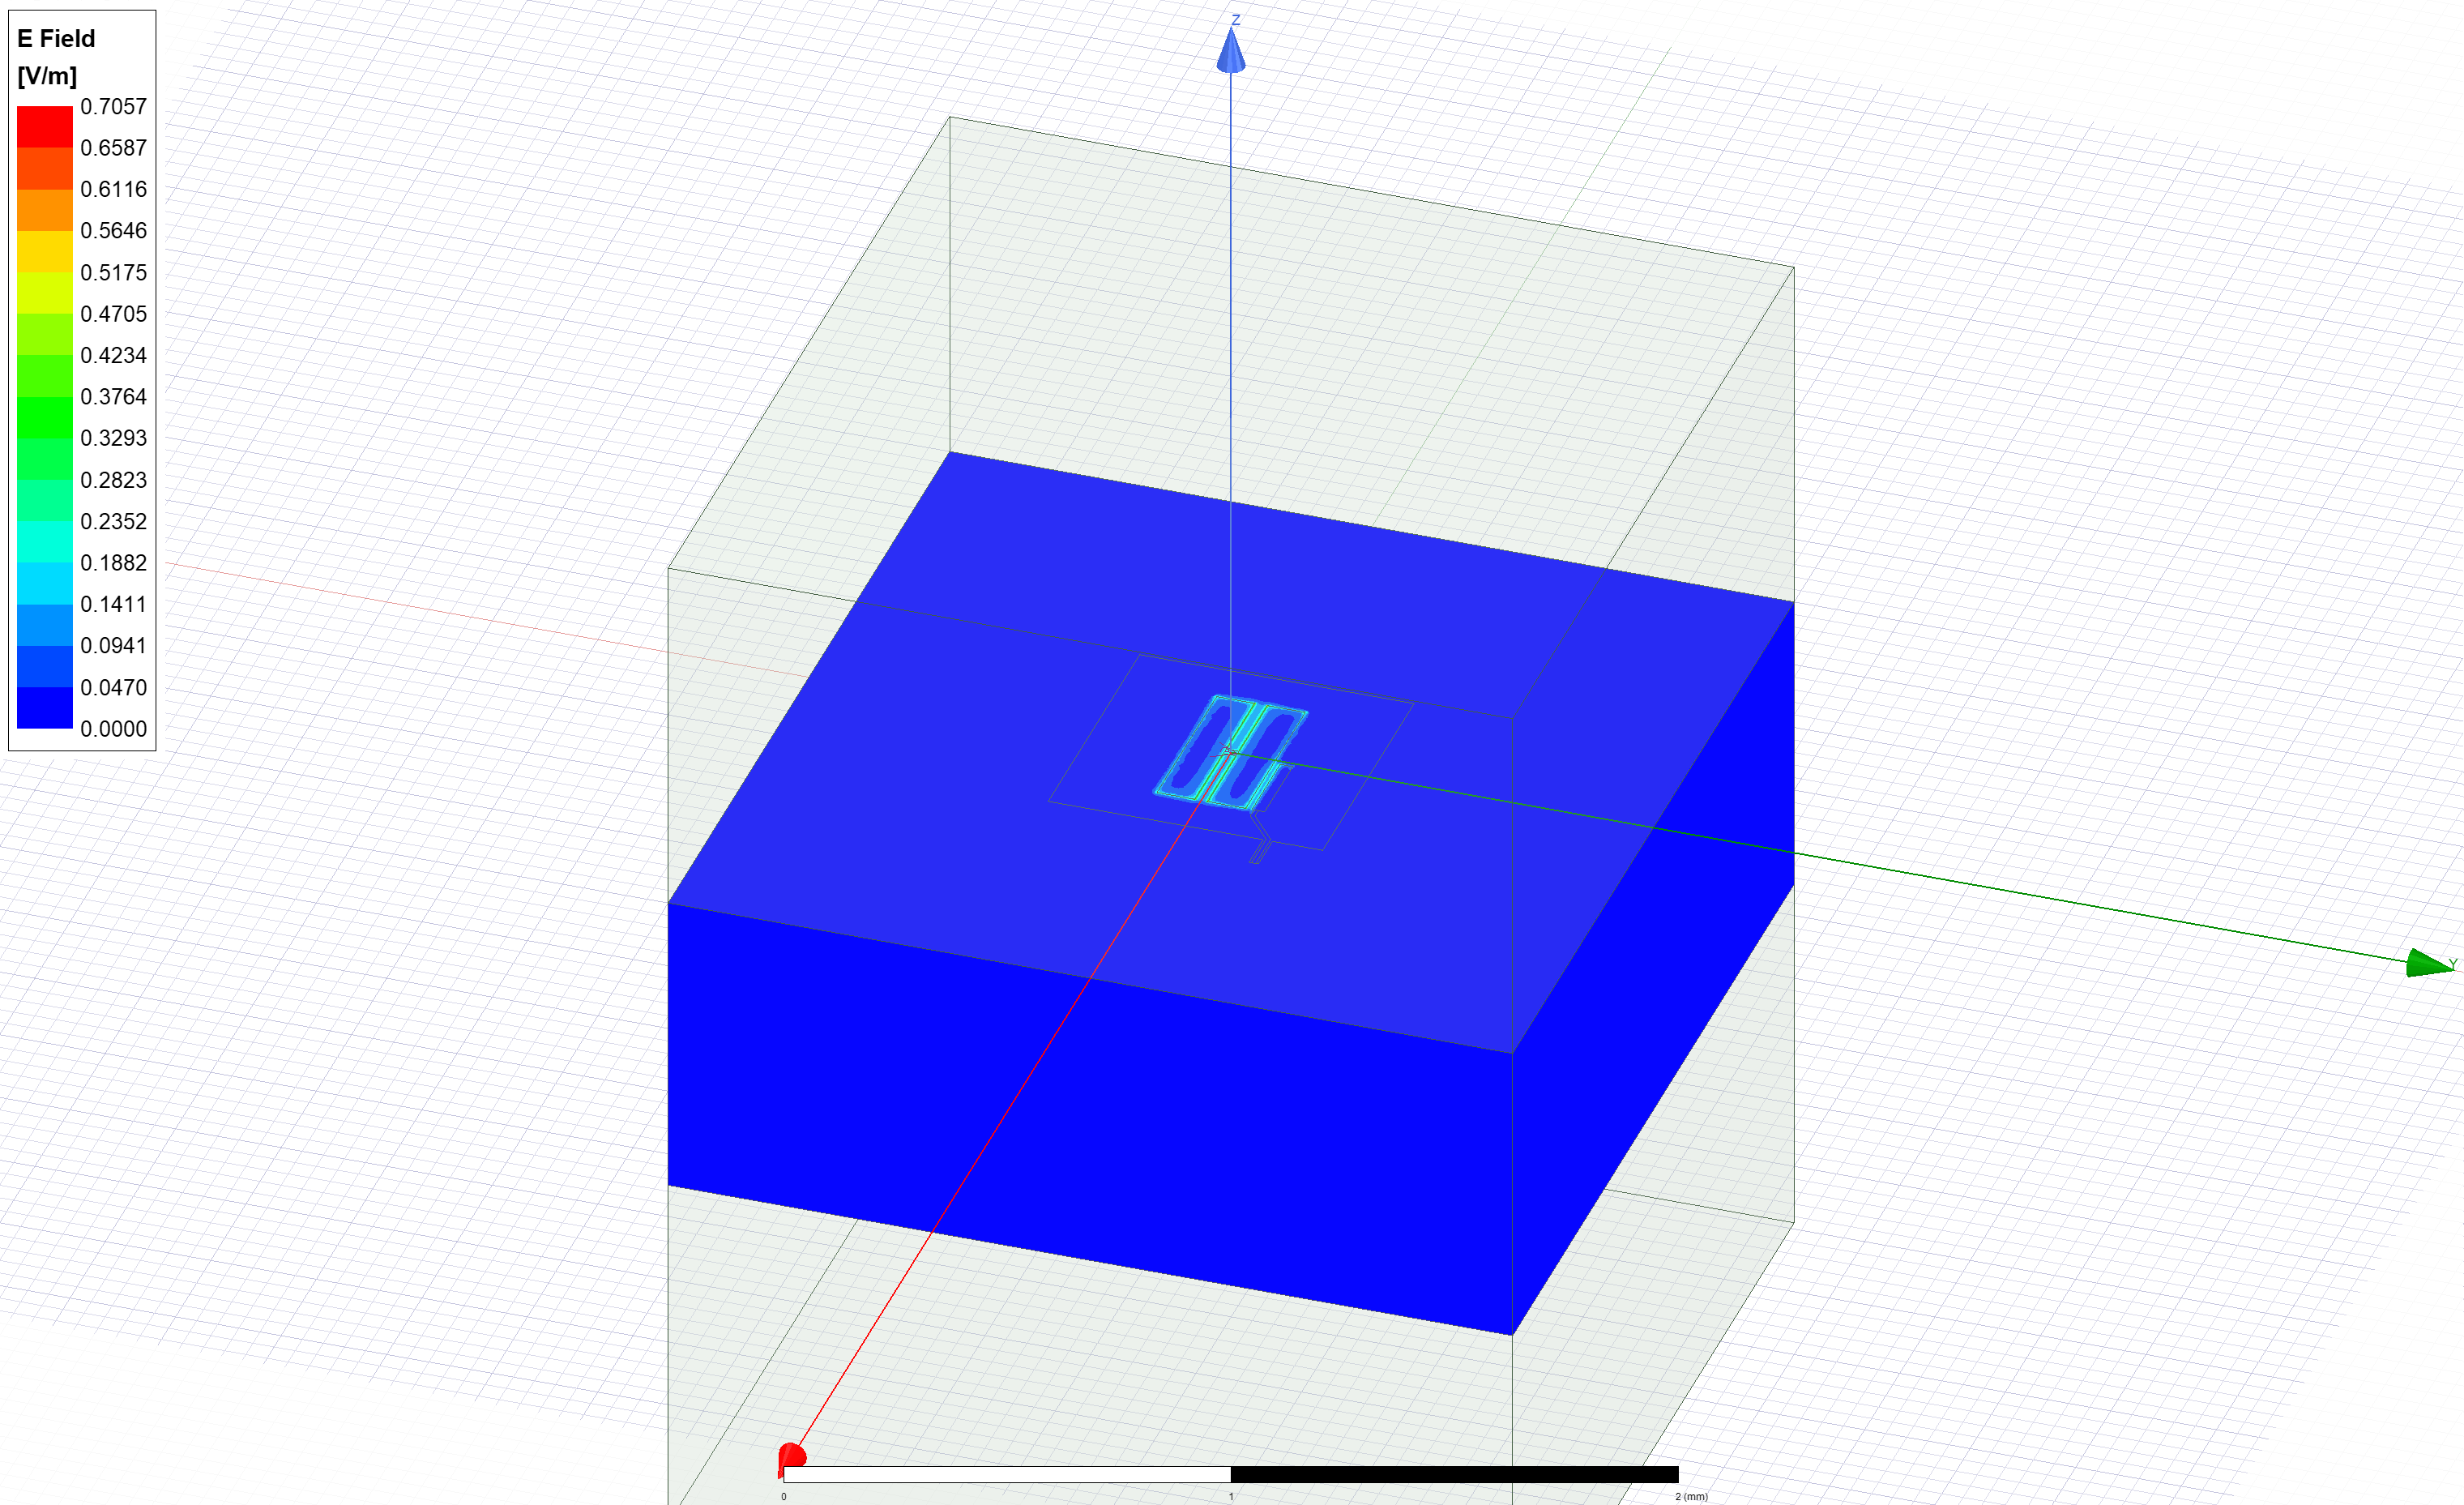

WindowsPath('C:/workspace/qiskit-metal/docs/tut/4 Analysis/ansys.png')

In [12]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

Delete the newly created E-field plot to prepare for the next phase.

In [13]:
hfss.plot_ansys_delete(['Mag_E1'])

In [14]:
%metal_print Part 2. Energy-Participation-Ratio Analysis

### Set up EPR parameters
Specify the junctions in the model; in this case there's only one, namely 'jj'.

In [15]:
#Non-linear (Josephson) junction
pinfo = hfss.pinfo # Project info
pinfo.junctions['jj'] = {'Lj_variable': 'Lj', 'rect': 'JJ_rect_Lj_Q1_rect_jj', 
                             'line': 'JJ_Lj_Q1_rect_jj_',  'Cj_variable': 'Cj'}
pinfo.validate_junction_info() # Check that valid names of variables and objects have been supplied
pinfo.dissipative['dielectrics_bulk'] = ['main'] # Dissipative elements: specify
# Handles  microwave analysis on eigenmode solutions
eprd = epr.DistributedAnalysis(pinfo)

Design "TransmonQubit" info:
	# eigenmodes    1
	# variations    1


Find the electric and magnetic energy stored in the substrate and the system as a whole.

In [16]:
ℰ_elec = eprd.calc_energy_electric()
ℰ_elec_substrate = eprd.calc_energy_electric(None, 'main')
ℰ_mag = eprd.calc_energy_magnetic()

print(f"""
ℰ_elec_all       = {ℰ_elec}
ℰ_elec_substrate = {ℰ_elec_substrate}
EPR of substrate = {ℰ_elec_substrate / ℰ_elec * 100 :.1f}%

ℰ_mag    = {ℰ_mag}
""")


ℰ_elec_all       = 1.89900915212966e-24
ℰ_elec_substrate = 1.74941090799734e-24
EPR of substrate = 92.1%

ℰ_mag    = 9.70546864298107e-27



### Run EPR analysis

Perform EPR analysis for all modes and variations.

In [17]:
eprd.do_EPR_analysis()

# 4a. Perform Hamiltonian spectrum post-analysis, building on mw solutions using EPR
epra = epr.QuantumAnalysis(eprd.data_filename)
epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 7)

# 4b. Report solved results
swp_variable = 'Lj' # suppose we swept an optimetric analysis vs. inductance Lj_alice
epra.plot_hamiltonian_results(swp_variable=swp_variable)
epra.report_results(swp_variable=swp_variable, numeric=True)


Variation 0  [1/1]

  Mode 0 at 6.37 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.5%  9.495e-25 4.853e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.90%
	jj              0.994569  (+)        0.0318699
		(U_tot_cap-U_tot_ind)/mean=1.58%
Calculating Qdielectric_main for mode 0 (0/0)
p_dielectric_main_0 = 0.9212229999183775


WARNING 01:16PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project16\TransmonQubit\2021-06-28 13-16-29.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.032285
dtype: float64

Pm_norm idx =
     jj
0  True
*** P (participation matrix, not normlz.)
         jj
0  0.963851

*** S (sign-bit matrix)
   s_jj
0     1
*** P (participation matrix, normalized.)
      0.99

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       307

*** Chi matrix ND (MHz) 
       342

*** Frequencies O1 PT (MHz)
0    6063.33422
dtype: float64

*** Frequencies ND (MHz)
0    6046.72123
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj              10
eigenmode         
0          6063.33

#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0
Lj          
10 0  342.02

Release Ansys session

In [18]:
hfss.disconnect_ansys()

In [19]:
%metal_heading Tutorial 2: Create and perform EPR analysis on a CPW resonator.

In [20]:
%metal_print Part 1. Finite Element Eigenmode Analysis

#### Update the design in Metal
Connect the transmon to a CPW. <br>
The other end of the CPW connects to an open to ground termination.

In [21]:
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
otg = OpenToGround(design, 'open_to_ground', options=dict(pos_x='1.75mm',  pos_y='0um', orientation='0'))
RouteMeander(design, 'readout',  Dict(
        total_length='6 mm',
        hfss_wire_bonds = True,
        fillet='90 um',
        lead = dict(start_straight='100um'),
        pin_inputs=Dict(
            start_pin=Dict(component='Q1', pin='readout'),
            end_pin=Dict(component='open_to_ground', pin='open')), ))

gui.rebuild()
gui.autoscale()

#### Render the resonator Design in Ansys
Connect again to Ansys. <br>
Then create and activate a separate eigenmode design called "Readout".

In [22]:
hfss.connect_ansys()
hfss.activate_eigenmode_design("Readout")

INFO 01:16PM [connect_project]: Connecting to Ansys Desktop API...
INFO 01:16PM [load_ansys_project]: 	Opened Ansys App
INFO 01:16PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 01:16PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Ansoft/
	Project:   Project16
INFO 01:16PM [connect_design]: 	Opened active design
	Design:    TransmonQubit [Solution type: Eigenmode]
INFO 01:16PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 01:16PM [connect]: 	Connected to project "Project16" and design "TransmonQubit" 😀 

01:16PM 37s WARNING [activate_eigenmode_design]: The name=Readout was not in active project.  A new design will be inserted to the project.  Names in active project are: 
['TransmonQubit'].  
INFO 01:16PM [connect_design]: 	Opened active design
	Design:    Readout [Solution type: Eigenmode]
WARNING 01:16PM [connect_setup]: 	No design setup detected.
WARNING 01:16PM [connect_setup]: 	Creating eigenmode default setup.
INFO 01:16P

Render the readout and an open to ground termination. <br>
Add open endcaps to both ends of the readout.

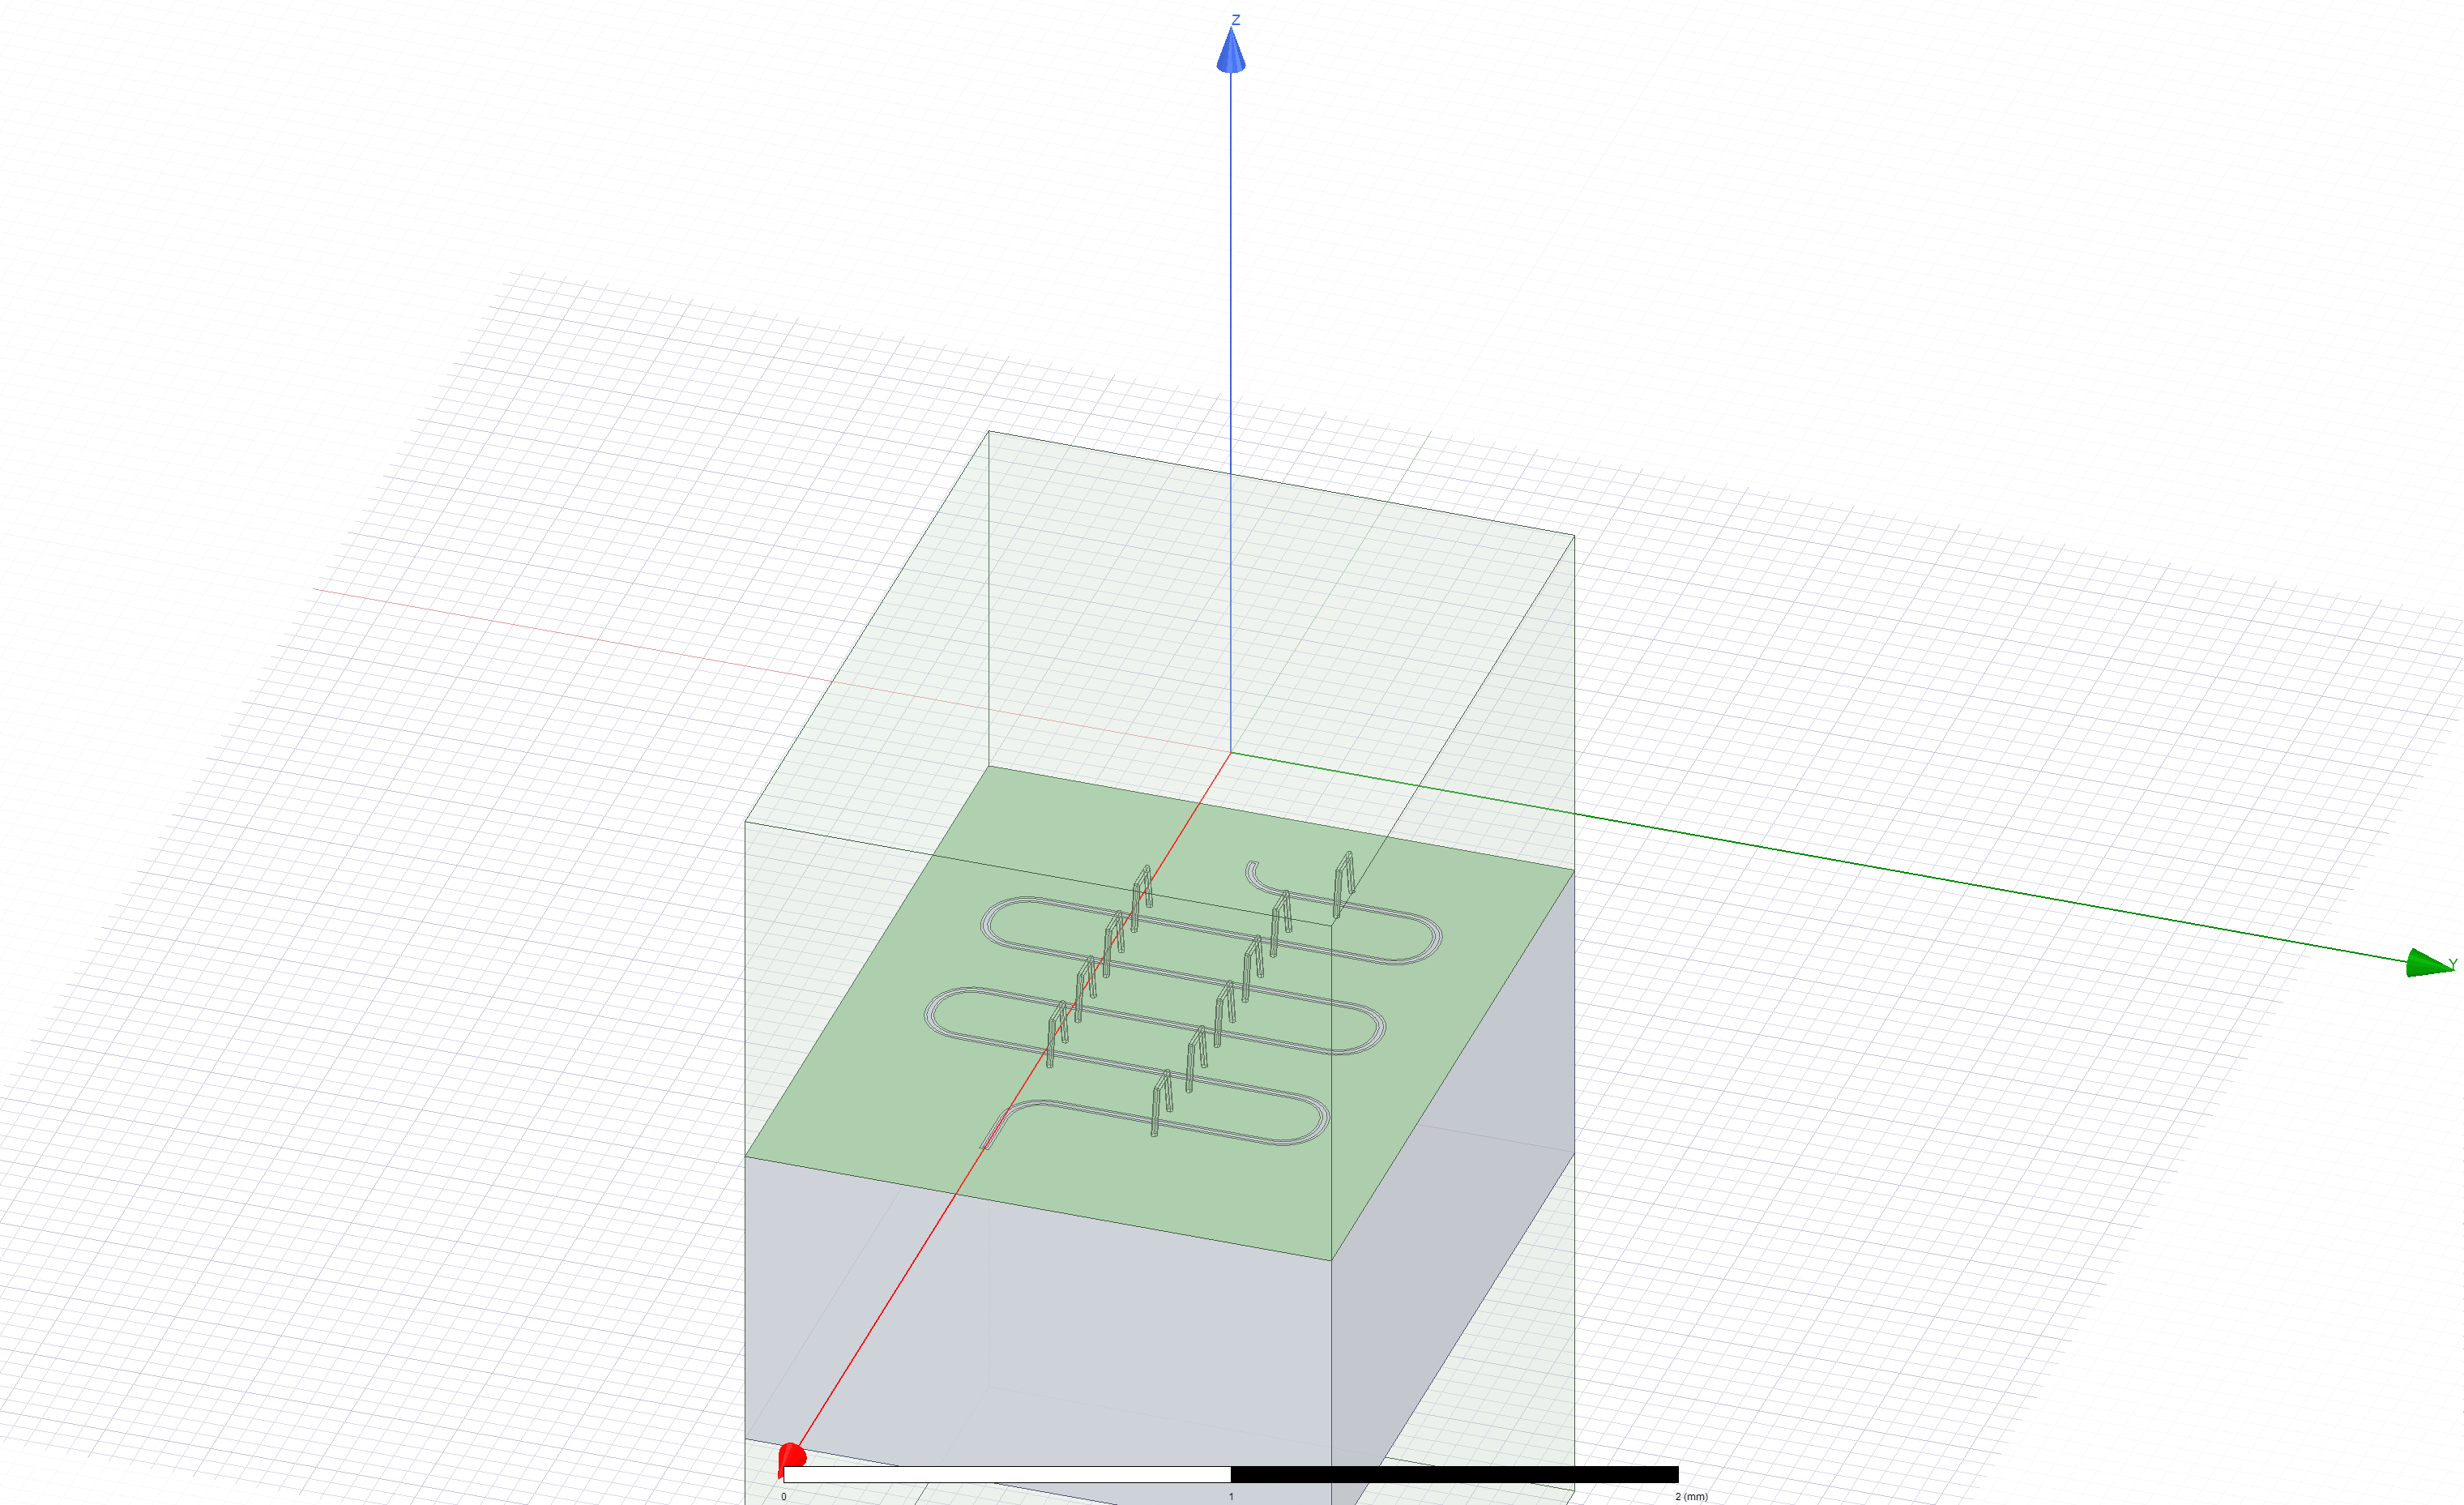

WindowsPath('C:/workspace/qiskit-metal/docs/tut/4 Analysis/ansys.png')

In [23]:
hfss.render_design(['readout', 'open_to_ground'], [('readout', 'start'), ('readout', 'end')])
hfss.save_screenshot()

#### Prepare and run the analysis, then plot E-field

Set variables in the Ansys design.

In [24]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 10
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
pinfo.design.set_variable('Lj', '10 nH')
pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()


Number of eigenmodes to find             = 1
Number of simulation passes              = 10
Convergence freq max delta percent diff  = 0.1



INFO 01:16PM [analyze]: Analyzing setup Setup
01:17PM 44s INFO [hfss_report_f_convergence]: Saved convergences to C:\workspace\qiskit-metal\docs\tut\4 Analysis\hfss_eig_f_convergence.csv


Recover eigenmode frequencies for each variation.

In [25]:
eprd = epr.DistributedAnalysis(hfss.pinfo)
eprd.get_ansys_frequencies_all()

Design "Readout" info:
	# eigenmodes    1
	# variations    1


Freq. (GHz)  Quality Factor
variation mode                             
0         0        9.758238             inf

Display the Ansys modeler window and plot the E-field on the chip's surface.

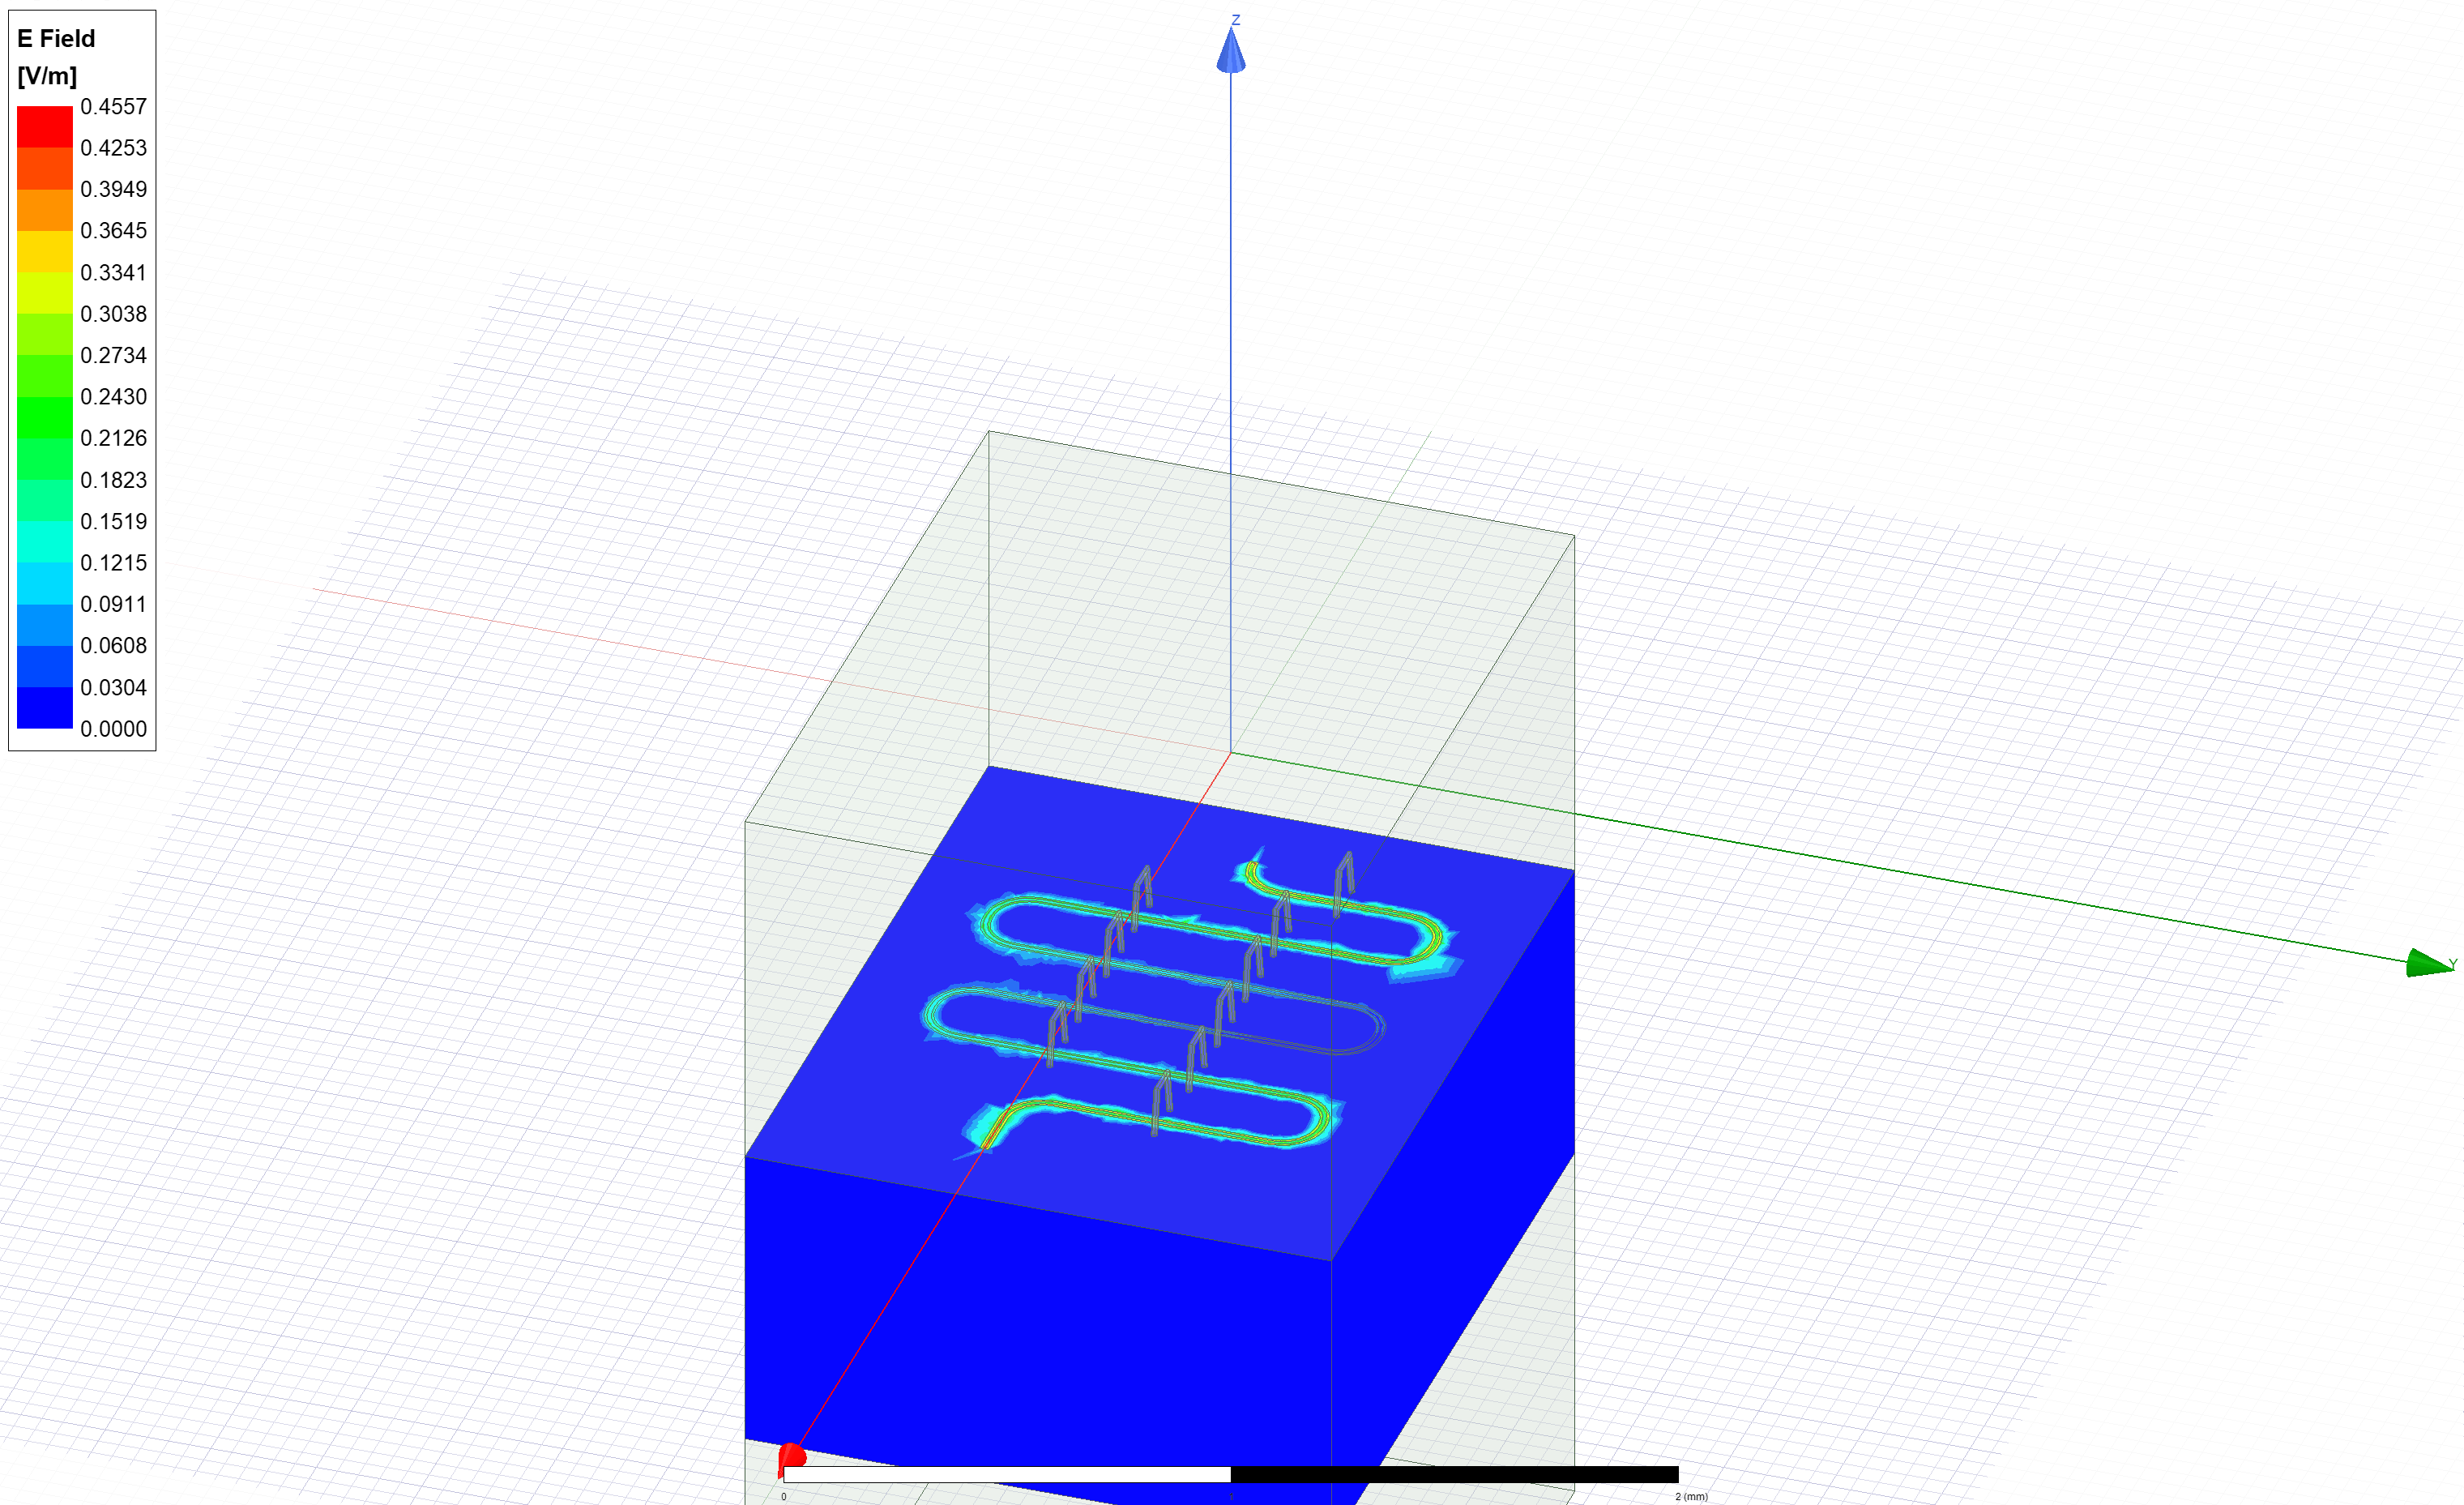

WindowsPath('C:/workspace/qiskit-metal/docs/tut/4 Analysis/ansys.png')

In [26]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

Delete the newly created E-field plot.

In [27]:
hfss.plot_ansys_delete(['Mag_E1'])

#### Try again with a larger number of steps (better convergence)

Update the number of passes, analyze, and plot convergence data.

In [28]:
setup.passes = 15
setup.analyze()
hfss.plot_convergences()

INFO 01:17PM [analyze]: Analyzing setup Setup
01:19PM 35s INFO [hfss_report_f_convergence]: Saved convergences to C:\workspace\qiskit-metal\docs\tut\4 Analysis\hfss_eig_f_convergence.csv


Display the Ansys modeler window again and plot the E-field on the chip's surface with this updated number of passes. <br>
Note that the bright areas have become much smoother compared to the previous image, indicating better convergence.

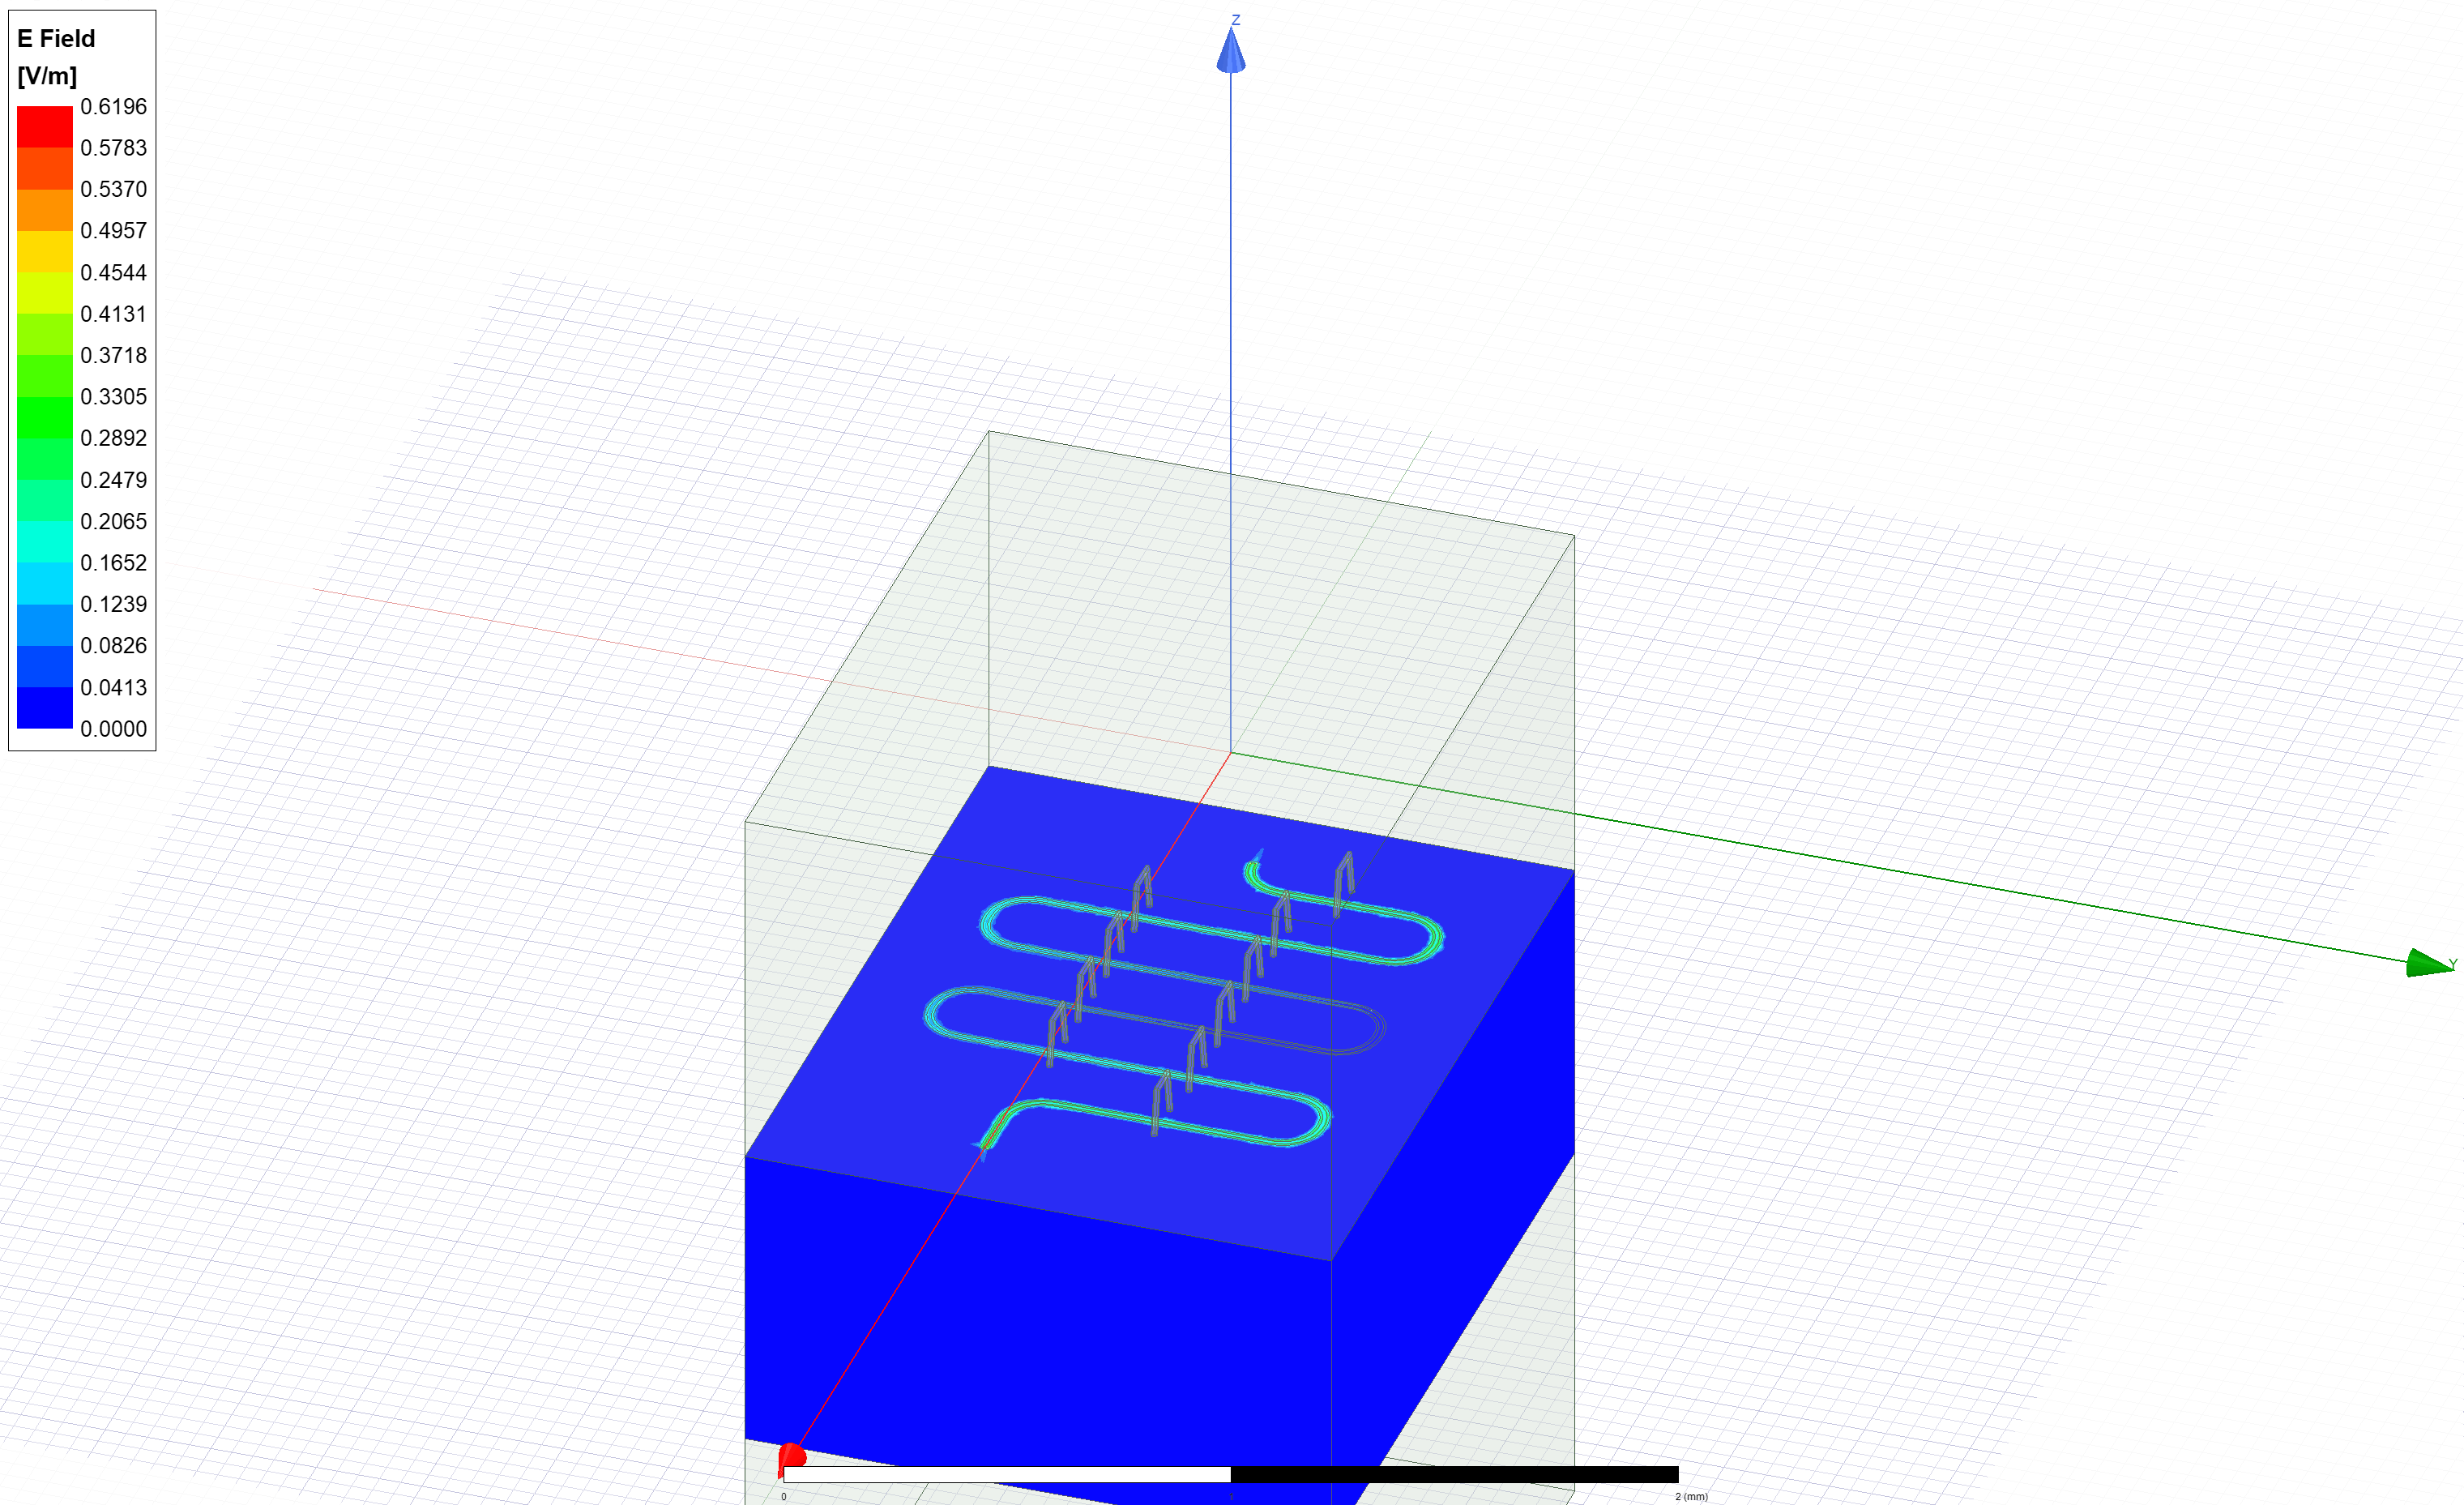

WindowsPath('C:/workspace/qiskit-metal/docs/tut/4 Analysis/ansys.png')

In [29]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [30]:
%metal_print Part 2. Energy-Participation-Ratio Analysis

Find the electric and magnetic energy stored in the substrate and the system as a whole.

In [31]:
ℰ_elec = eprd.calc_energy_electric()
ℰ_elec_substrate = eprd.calc_energy_electric(None, 'main')
ℰ_mag = eprd.calc_energy_magnetic()

print(f"""
ℰ_elec_all       = {ℰ_elec}
ℰ_elec_substrate = {ℰ_elec_substrate}
EPR of substrate = {ℰ_elec_substrate / ℰ_elec * 100 :.1f}%

ℰ_mag_all       = {ℰ_mag}
ℰ_mag % of ℰ_elec_all  = {ℰ_mag / ℰ_elec * 100 :.1f}%
""")


ℰ_elec_all       = 1.66510643660783e-24
ℰ_elec_substrate = 1.52595655801428e-24
EPR of substrate = 91.6%

ℰ_mag_all       = 1.66510700335685e-24
ℰ_mag % of ℰ_elec_all  = 100.0%



Release Ansys session

In [32]:
hfss.disconnect_ansys()

In [33]:
%metal_heading Tutorial 3: Analyze the combined transmon + CPW resonator system. 

In [34]:
%metal_print Part 1. Finite Element Eigenmode Analysis

Connect to Ansys, then create and activate an eigenmode Ansys design called "TransmonResonator".

In [35]:
hfss.connect_ansys()
hfss.activate_eigenmode_design("TransmonResonator")

INFO 01:19PM [connect_project]: Connecting to Ansys Desktop API...
INFO 01:19PM [load_ansys_project]: 	Opened Ansys App
INFO 01:19PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 01:19PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Ansoft/
	Project:   Project16
INFO 01:19PM [connect_design]: 	Opened active design
	Design:    Readout [Solution type: Eigenmode]
INFO 01:19PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 01:19PM [connect]: 	Connected to project "Project16" and design "Readout" 😀 

01:19PM 45s WARNING [activate_eigenmode_design]: The name=TransmonResonator was not in active project.  A new design will be inserted to the project.  Names in active project are: 
['Readout', 'TransmonQubit'].  
INFO 01:19PM [connect_design]: 	Opened active design
	Design:    TransmonResonator [Solution type: Eigenmode]
WARNING 01:19PM [connect_setup]: 	No design setup detected.
WARNING 01:19PM [connect_setup]: 	Creating eigenmode default

Render everything in the Metal design, including both the transmon and the readout. <br>
Add an open endcap to the readout.

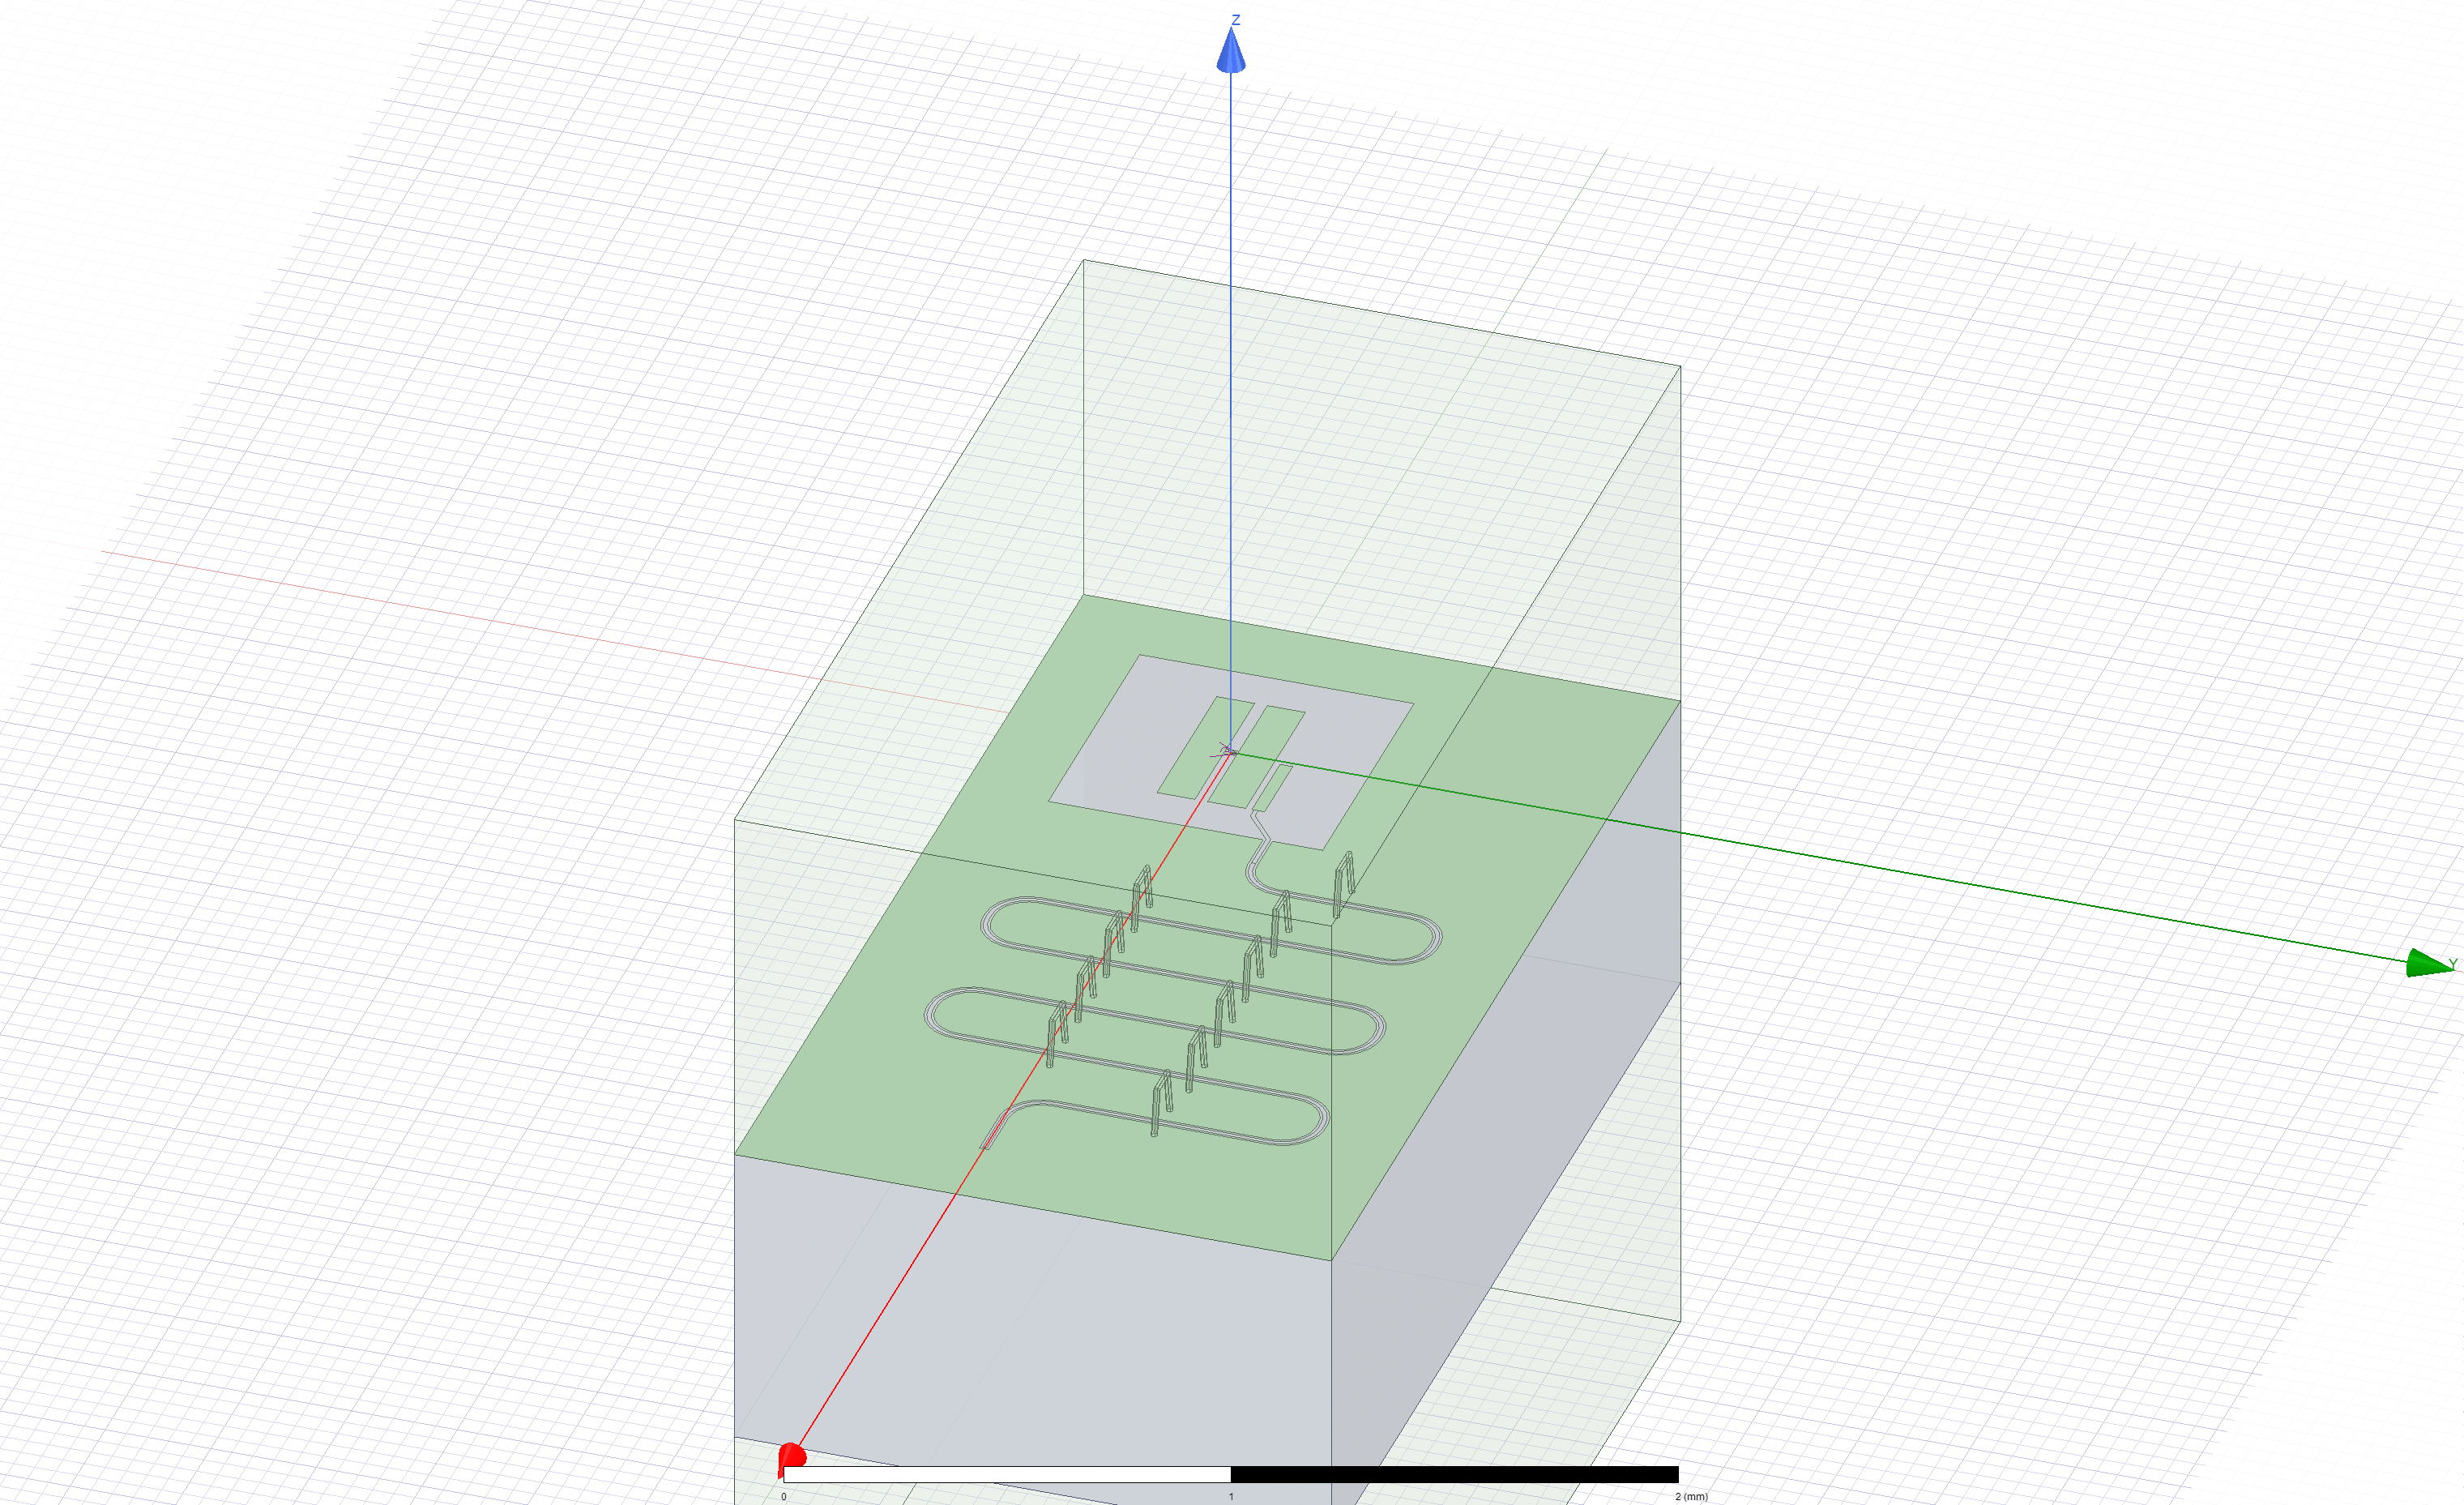

WindowsPath('C:/workspace/qiskit-metal/docs/tut/4 Analysis/ansys.png')

In [36]:
hfss.render_design(['Q1', 'readout', 'open_to_ground'], [('readout', 'end')])
hfss.save_screenshot()

Set variables in the Ansys design. Note that this time we seek 2 eigenmodes - one with stronger fields near the transmon, the other with stronger fields near the resonator.

In [37]:
# Analysis properties
setup = hfss.pinfo.setup
setup.n_modes = 2
setup.passes = 10
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
pinfo.design.set_variable('Lj', '10 nH')
pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 01:20PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 2
Number of simulation passes              = 10
Convergence freq max delta percent diff  = 0.1



01:21PM 35s INFO [hfss_report_f_convergence]: Saved convergences to C:\workspace\qiskit-metal\docs\tut\4 Analysis\hfss_eig_f_convergence.csv
INFO 01:21PM [__del__]: Disconnected from Ansys HFSS


Display the Ansys modeler window again and plot the E-field on the chip's surface.

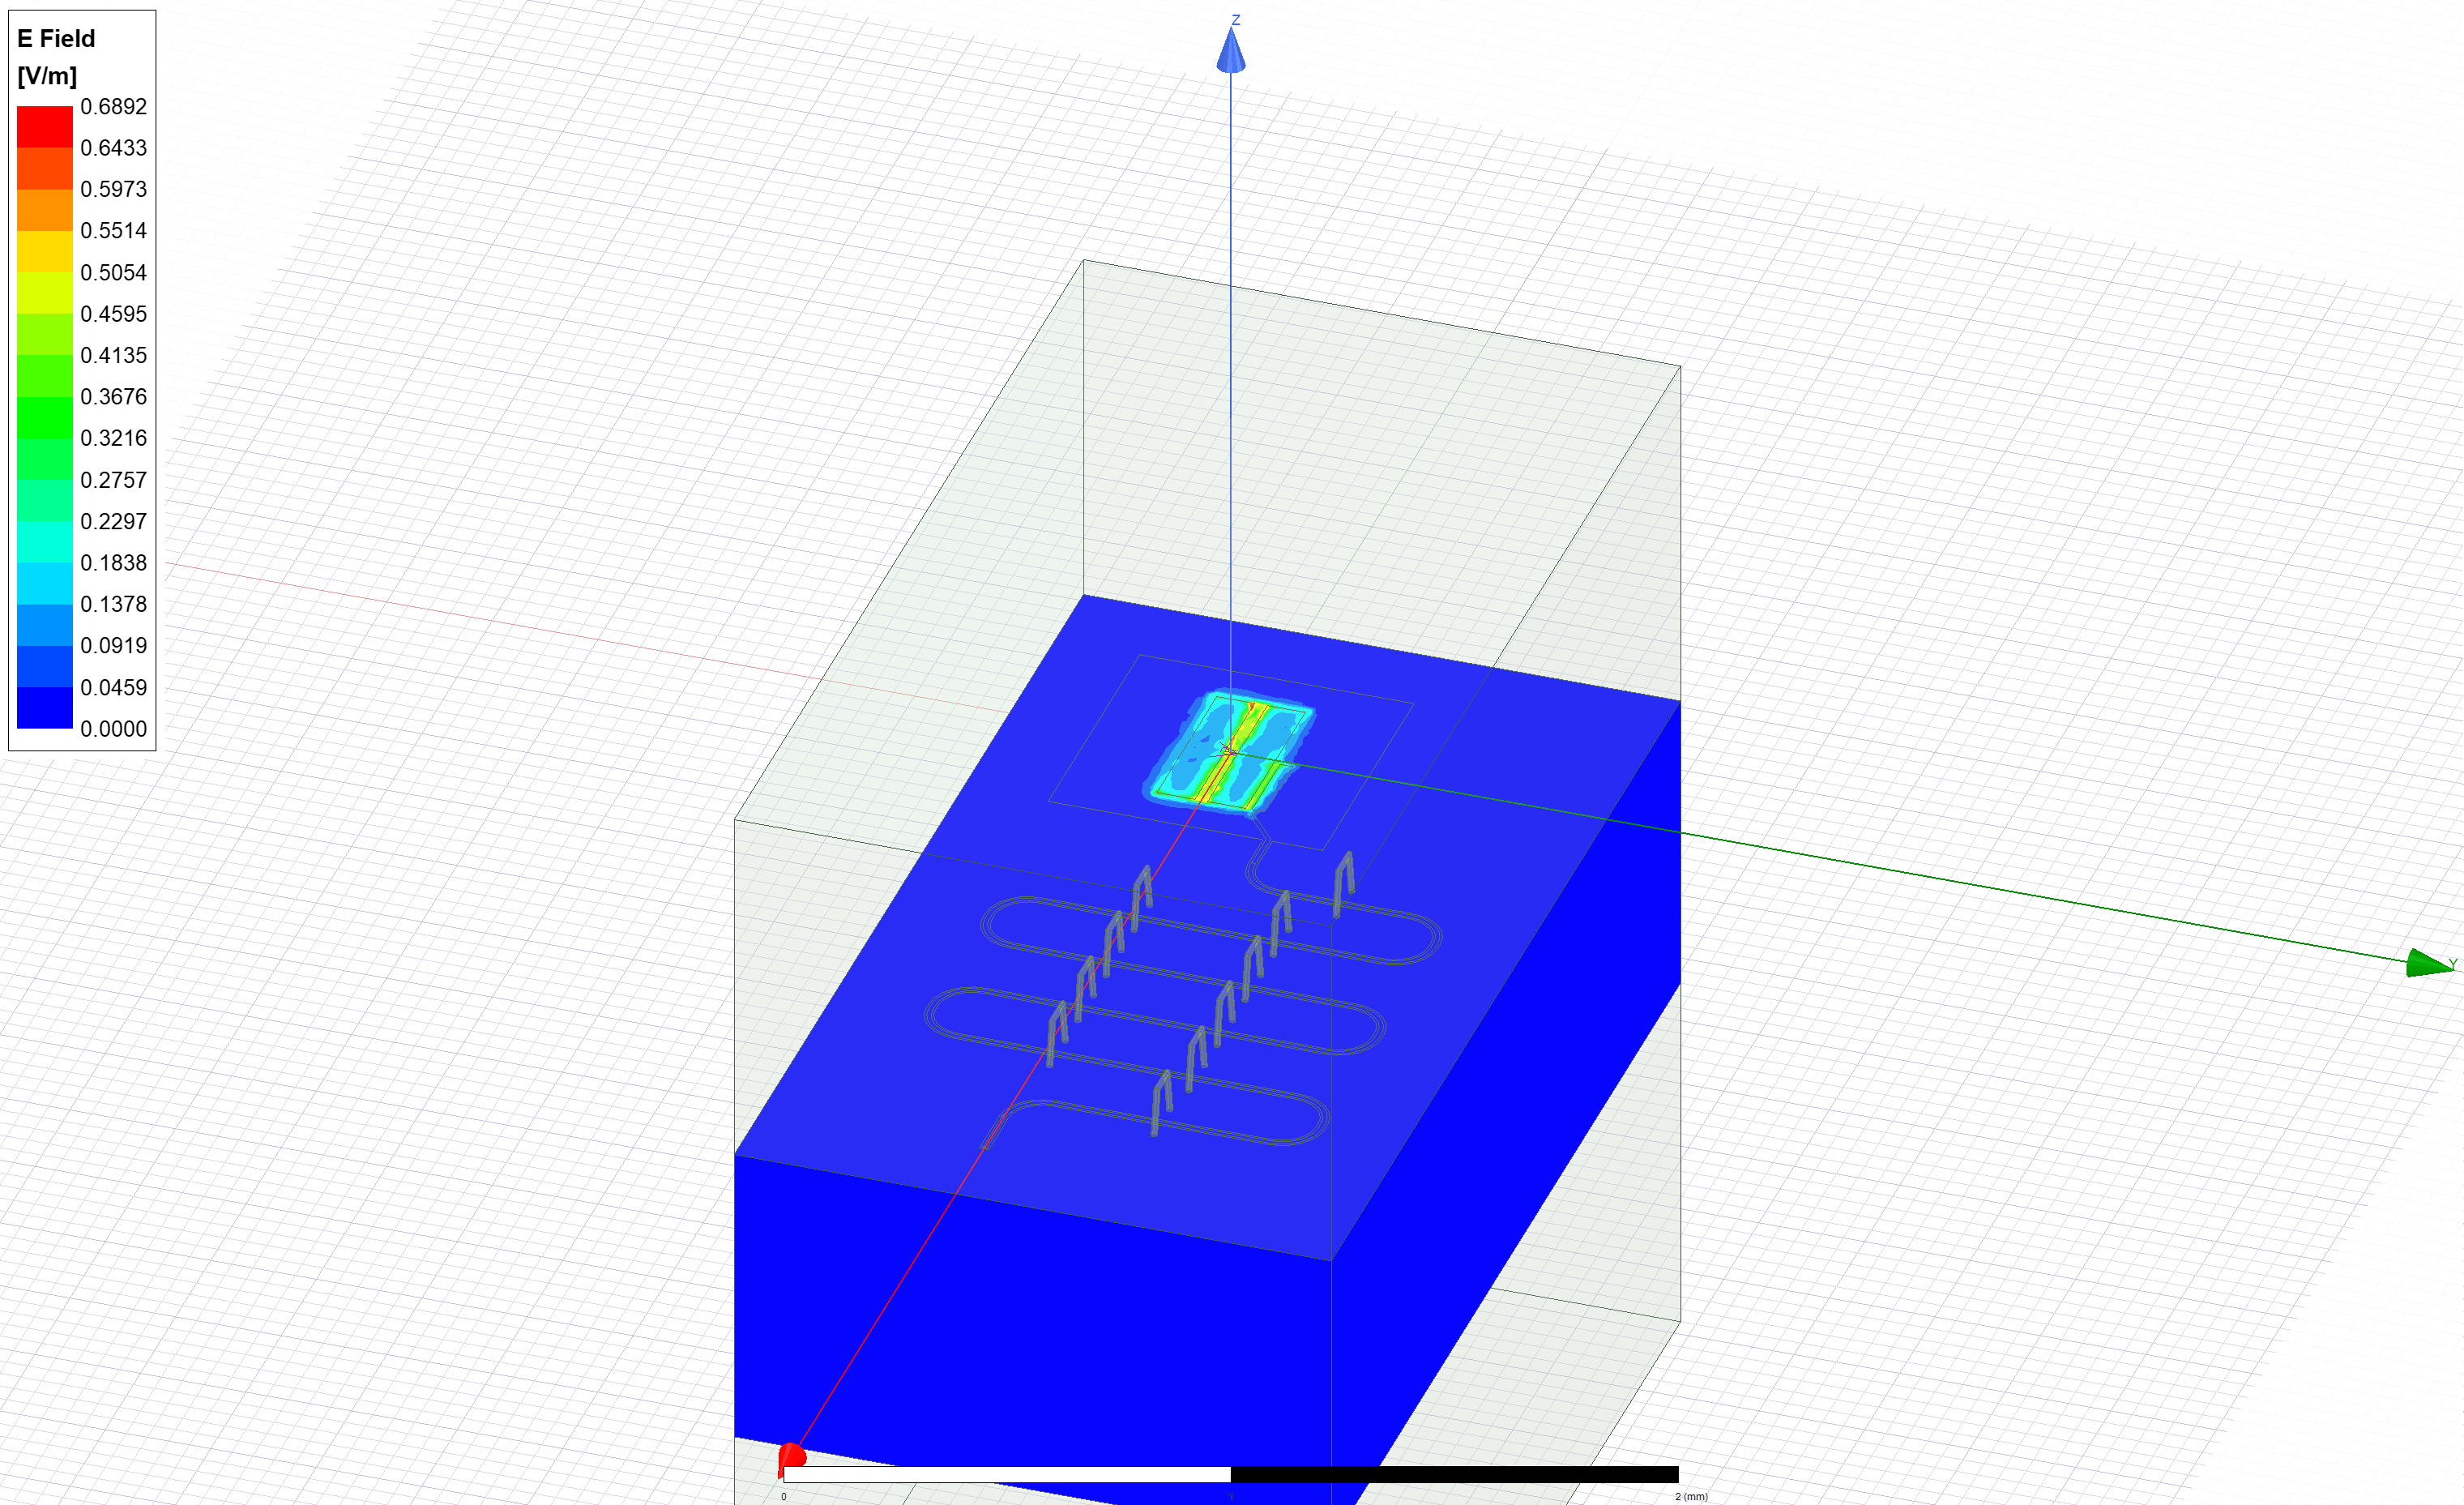

WindowsPath('C:/workspace/qiskit-metal/docs/tut/4 Analysis/ansys.png')

In [38]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

Delete the newly created E-field plot.

In [39]:
hfss.plot_ansys_delete(['Mag_E1'])

In [40]:
%metal_print Part 2. Energy-Participation-Ratio Analysis

Specify the junctions in the model; in this case there's only one, namely 'jj'.

In [41]:
#Non-linear (Josephson) junction
pinfo = hfss.pinfo 
pinfo.junctions['jj'] = {'Lj_variable': 'Lj',  'rect': 'JJ_rect_Lj_Q1_rect_jj', 
                             'line': 'JJ_Lj_Q1_rect_jj_',  'Cj_variable': 'Cj'}
pinfo.validate_junction_info() # Check that valid names of variables and objects have been supplied
pinfo.dissipative['dielectrics_bulk'] = ['main'] # Dissipative elements: specify
# Handles  microwave analysis on eigenmode solutions
eprd = epr.DistributedAnalysis(pinfo)

Design "TransmonResonator" info:
	# eigenmodes    2
	# variations    1


In [42]:
eprd = epr.DistributedAnalysis(pinfo)
eprd.set_mode(1)

Design "TransmonResonator" info:
	# eigenmodes    2
	# variations    1


Find the electric and magnetic energy stored in the substrate and the system as a whole.

In [43]:
ℰ_elec = eprd.calc_energy_electric()
ℰ_elec_substrate = eprd.calc_energy_electric(None, 'main')
ℰ_mag = eprd.calc_energy_magnetic()

print(f"""
ℰ_elec_all       = {ℰ_elec}
ℰ_elec_substrate = {ℰ_elec_substrate}
EPR of substrate = {ℰ_elec_substrate / ℰ_elec * 100 :.1f}%

ℰ_mag_all       = {ℰ_mag}
ℰ_mag % of ℰ_elec_all  = {ℰ_mag / ℰ_elec * 100 :.1f}%
""")


ℰ_elec_all       = 4.94632181763544e-24
ℰ_elec_substrate = 4.51496909995034e-24
EPR of substrate = 91.3%

ℰ_mag_all       = 4.93524419483239e-24
ℰ_mag % of ℰ_elec_all  = 99.8%



In [44]:
eprd.set_mode(0)

Perform EPR analysis for all modes and variations.

In [45]:
eprd.do_EPR_analysis()

# 4a. Perform Hamiltonian spectrum post-analysis, building on mw solutions using EPR
epra = epr.QuantumAnalysis(eprd.data_filename)
epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 7)

# 4b. Report solved results
swp_variable = 'Lj' # suppose we swept an optimetric analysis vs. inductance Lj_alice
epra.plot_hamiltonian_results(swp_variable=swp_variable)
epra.report_results(swp_variable=swp_variable, numeric=True)


Variation 0  [1/1]

  Mode 0 at 6.14 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.2%  6.399e-24 5.048e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.11%
	jj              0.991704  (+)        0.0295085
		(U_tot_cap-U_tot_ind)/mean=1.47%
Calculating Qdielectric_main for mode 0 (0/1)
p_dielectric_main_0 = 0.9109500508597608

  Mode 1 at 9.35 GHz   [2/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.2%  2.473e-24 2.468e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 93.54%
	jj              0.00283247  (+)        0.000195612
		(U_tot_cap-U_tot_ind)/mean=-0.02%
Calculating Qdielectri

WARNING 01:21PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project16\TransmonResonator\2021-06-28 13-21-41.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.030048
1    0.929684
dtype: float64

Pm_norm idx =
      jj
0   True
1  False
*** P (participation matrix, not normlz.)
         jj
0  0.963279
1  0.002832

*** S (sign-bit matrix)
   s_jj
0     1
1     1
*** P (participation matrix, normalized.)
      0.99
    0.0028

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       284     2.47
      2.47  0.00536

*** Chi matrix ND (MHz) 
       315     2.13
      2.13    0.004

*** Frequencies O1 PT (MHz)
0    5853.906885
1    9351.093780
dtype: float64

*** Frequencies ND (MHz)
0    5838.987407
1    9351.137733
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj              10
eigenmode         
0          5853.91
1          9351.09

#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0         1
Lj                    
10 0  315.43  2.13e+00
   1    2.13  4.00e-03

Release Ansys's session

In [46]:
hfss.disconnect_ansys()

In [47]:
%metal_heading Tutorial 4: Analyze a coupled 2 transmon system. 

In [48]:
%metal_print Part 1. Finite Element Eigenmode Analysis

Connect to Ansys, then create and activate an eigenmode Ansys design called "TransmonResonator".

In [49]:
hfss.connect_ansys()

INFO 01:21PM [connect_project]: Connecting to Ansys Desktop API...
INFO 01:21PM [load_ansys_project]: 	Opened Ansys App
INFO 01:21PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 01:21PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Ansoft/
	Project:   Project16
INFO 01:21PM [connect_design]: 	Opened active design
	Design:    TransmonResonator [Solution type: Eigenmode]
INFO 01:21PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 01:21PM [connect]: 	Connected to project "Project16" and design "TransmonResonator" 😀 



In [50]:
hfss.activate_eigenmode_design("TwoTransmon")

01:21PM 54s WARNING [activate_eigenmode_design]: The name=TwoTransmon was not in active project.  A new design will be inserted to the project.  Names in active project are: 
['TransmonResonator', 'Readout', 'TransmonQubit'].  
INFO 01:21PM [connect_design]: 	Opened active design
	Design:    TwoTransmon [Solution type: Eigenmode]
WARNING 01:21PM [connect_setup]: 	No design setup detected.
WARNING 01:21PM [connect_setup]: 	Creating eigenmode default setup.
INFO 01:21PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


Create a Metal design consisting of 2 transmons connected by a short coupler.

In [51]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight

design.delete_all_components()

q1 = TransmonPocket(design, 'Q1', options = dict(
    pad_width = '425 um', 
    pocket_height = '650um',
    connection_pads=dict(
        readout = dict(loc_W=+1,loc_H=+1, pad_width='200um')
    )))

q2 = TransmonPocket(design, 'Q2', options = dict(
    pos_x = '1.0 mm',
    pad_width = '425 um', 
    pocket_height = '650um',
    connection_pads=dict(
        readout = dict(loc_W=-1,loc_H=+1, pad_width='200um')
    )))

coupler = RouteStraight(design, 'coupler', Dict(hfss_wire_bonds = True,
        pin_inputs=Dict(
            start_pin=Dict(component='Q1', pin='readout'),
            end_pin=Dict(component='Q2', pin='readout')), ))

gui.rebuild()
gui.autoscale()

In [52]:
hfss.options['x_buffer_width_mm'] = 0.5
hfss.options['y_buffer_width_mm'] = 0.5
hfss.options['wb_threshold'] = '100um'
hfss.options['wb_size'] = 5
hfss.options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'ansys_file_extension': '.aedt',
 'x_buffer_width_mm': 0.5,
 'y_buffer_width_mm': 0.5,
 'wb_threshold': '100um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [53]:
qcomps = design.components
qcomps['Q1'].options['hfss_inductance'] = 'Lj1'
qcomps['Q1'].options['hfss_capacitance'] = 'Cj1'
qcomps['Q2'].options['hfss_inductance'] = 'Lj2'
qcomps['Q2'].options['hfss_capacitance'] = 'Cj2'
gui.rebuild()

In [54]:
design.qgeometry.tables['junction']

component     name                                        geometry  layer  \
0         4  rect_jj  LINESTRING (0.00000 -0.01500, 0.00000 0.01500)      1   
1         5  rect_jj  LINESTRING (1.00000 -0.01500, 1.00000 0.01500)      1   

   subtract  helper  chip  width hfss_inductance hfss_capacitance  \
0     False   False  main   0.02             Lj1              Cj1   
1     False   False  main   0.02             Lj2              Cj2   

   hfss_resistance  hfss_mesh_kw_jj q3d_inductance  q3d_capacitance  \
0                0         0.000007           10nH                0   
1                0         0.000007           10nH                0   

   q3d_resistance  q3d_mesh_kw_jj      gds_cell_name  
0               0        0.000007  my_other_junction  
1               0        0.000007  my_other_junction

Identify the mode you want. The mode can inclusively be from 1 to setup.n_modes.

In [55]:
hfss.set_mode(1, "Setup")

INFO 01:21PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


Set variables in the Ansys design. As before, we seek 2 modes.

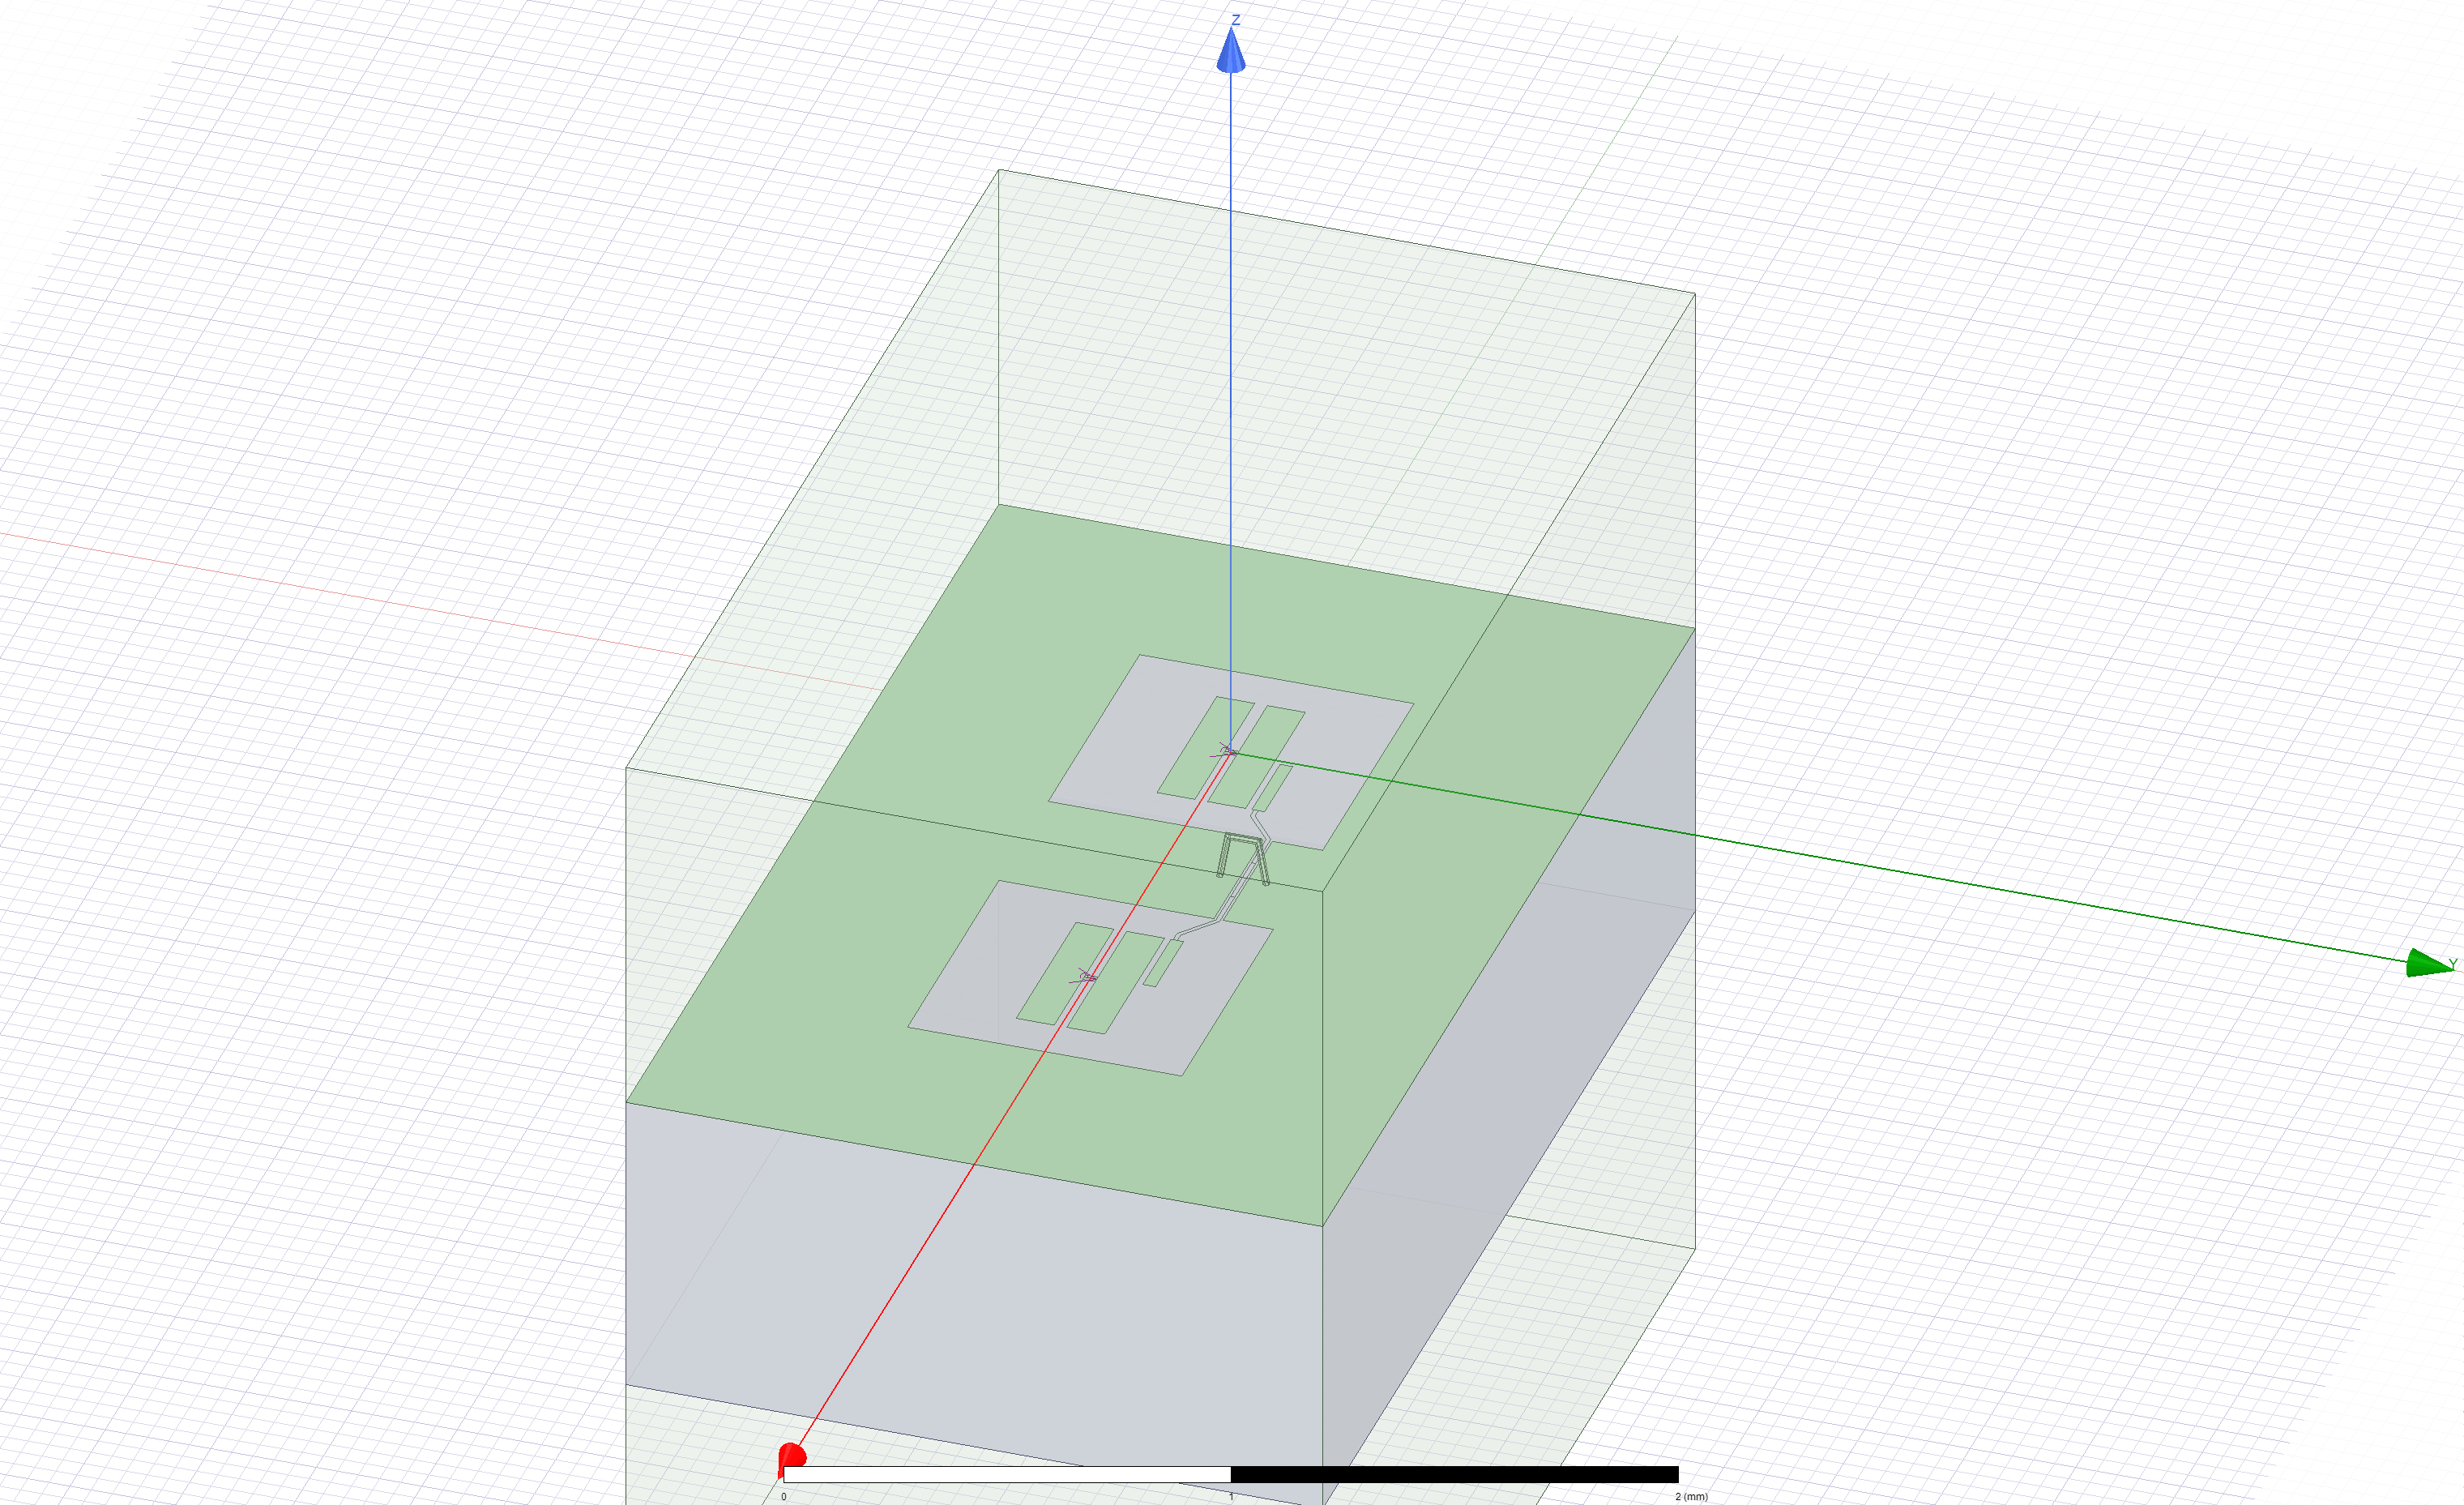

In [56]:
hfss.render_design(['coupler', 'Q1', 'Q2'], [])
hfss.save_screenshot()

Set up the simulation and specify the variables for the sweep.

In [57]:
setup = hfss.pinfo.setup
setup.passes = 15
setup.delta_f = 0.05
setup.n_modes = 2

pinfo = hfss.pinfo
pinfo.design.set_variable('Lj1', '13 nH')
pinfo.design.set_variable('Cj1', '0 fF')
pinfo.design.set_variable('Lj2', '9 nH')
pinfo.design.set_variable('Cj2', '0 fF')

pinfo.setup.analyze()

hfss.plot_convergences()

INFO 01:22PM [analyze]: Analyzing setup Setup
01:23PM 15s INFO [hfss_report_f_convergence]: Saved convergences to C:\workspace\qiskit-metal\docs\tut\4 Analysis\hfss_eig_f_convergence.csv


Display the Ansys modeler window again and plot the E-field on the chip's surface.

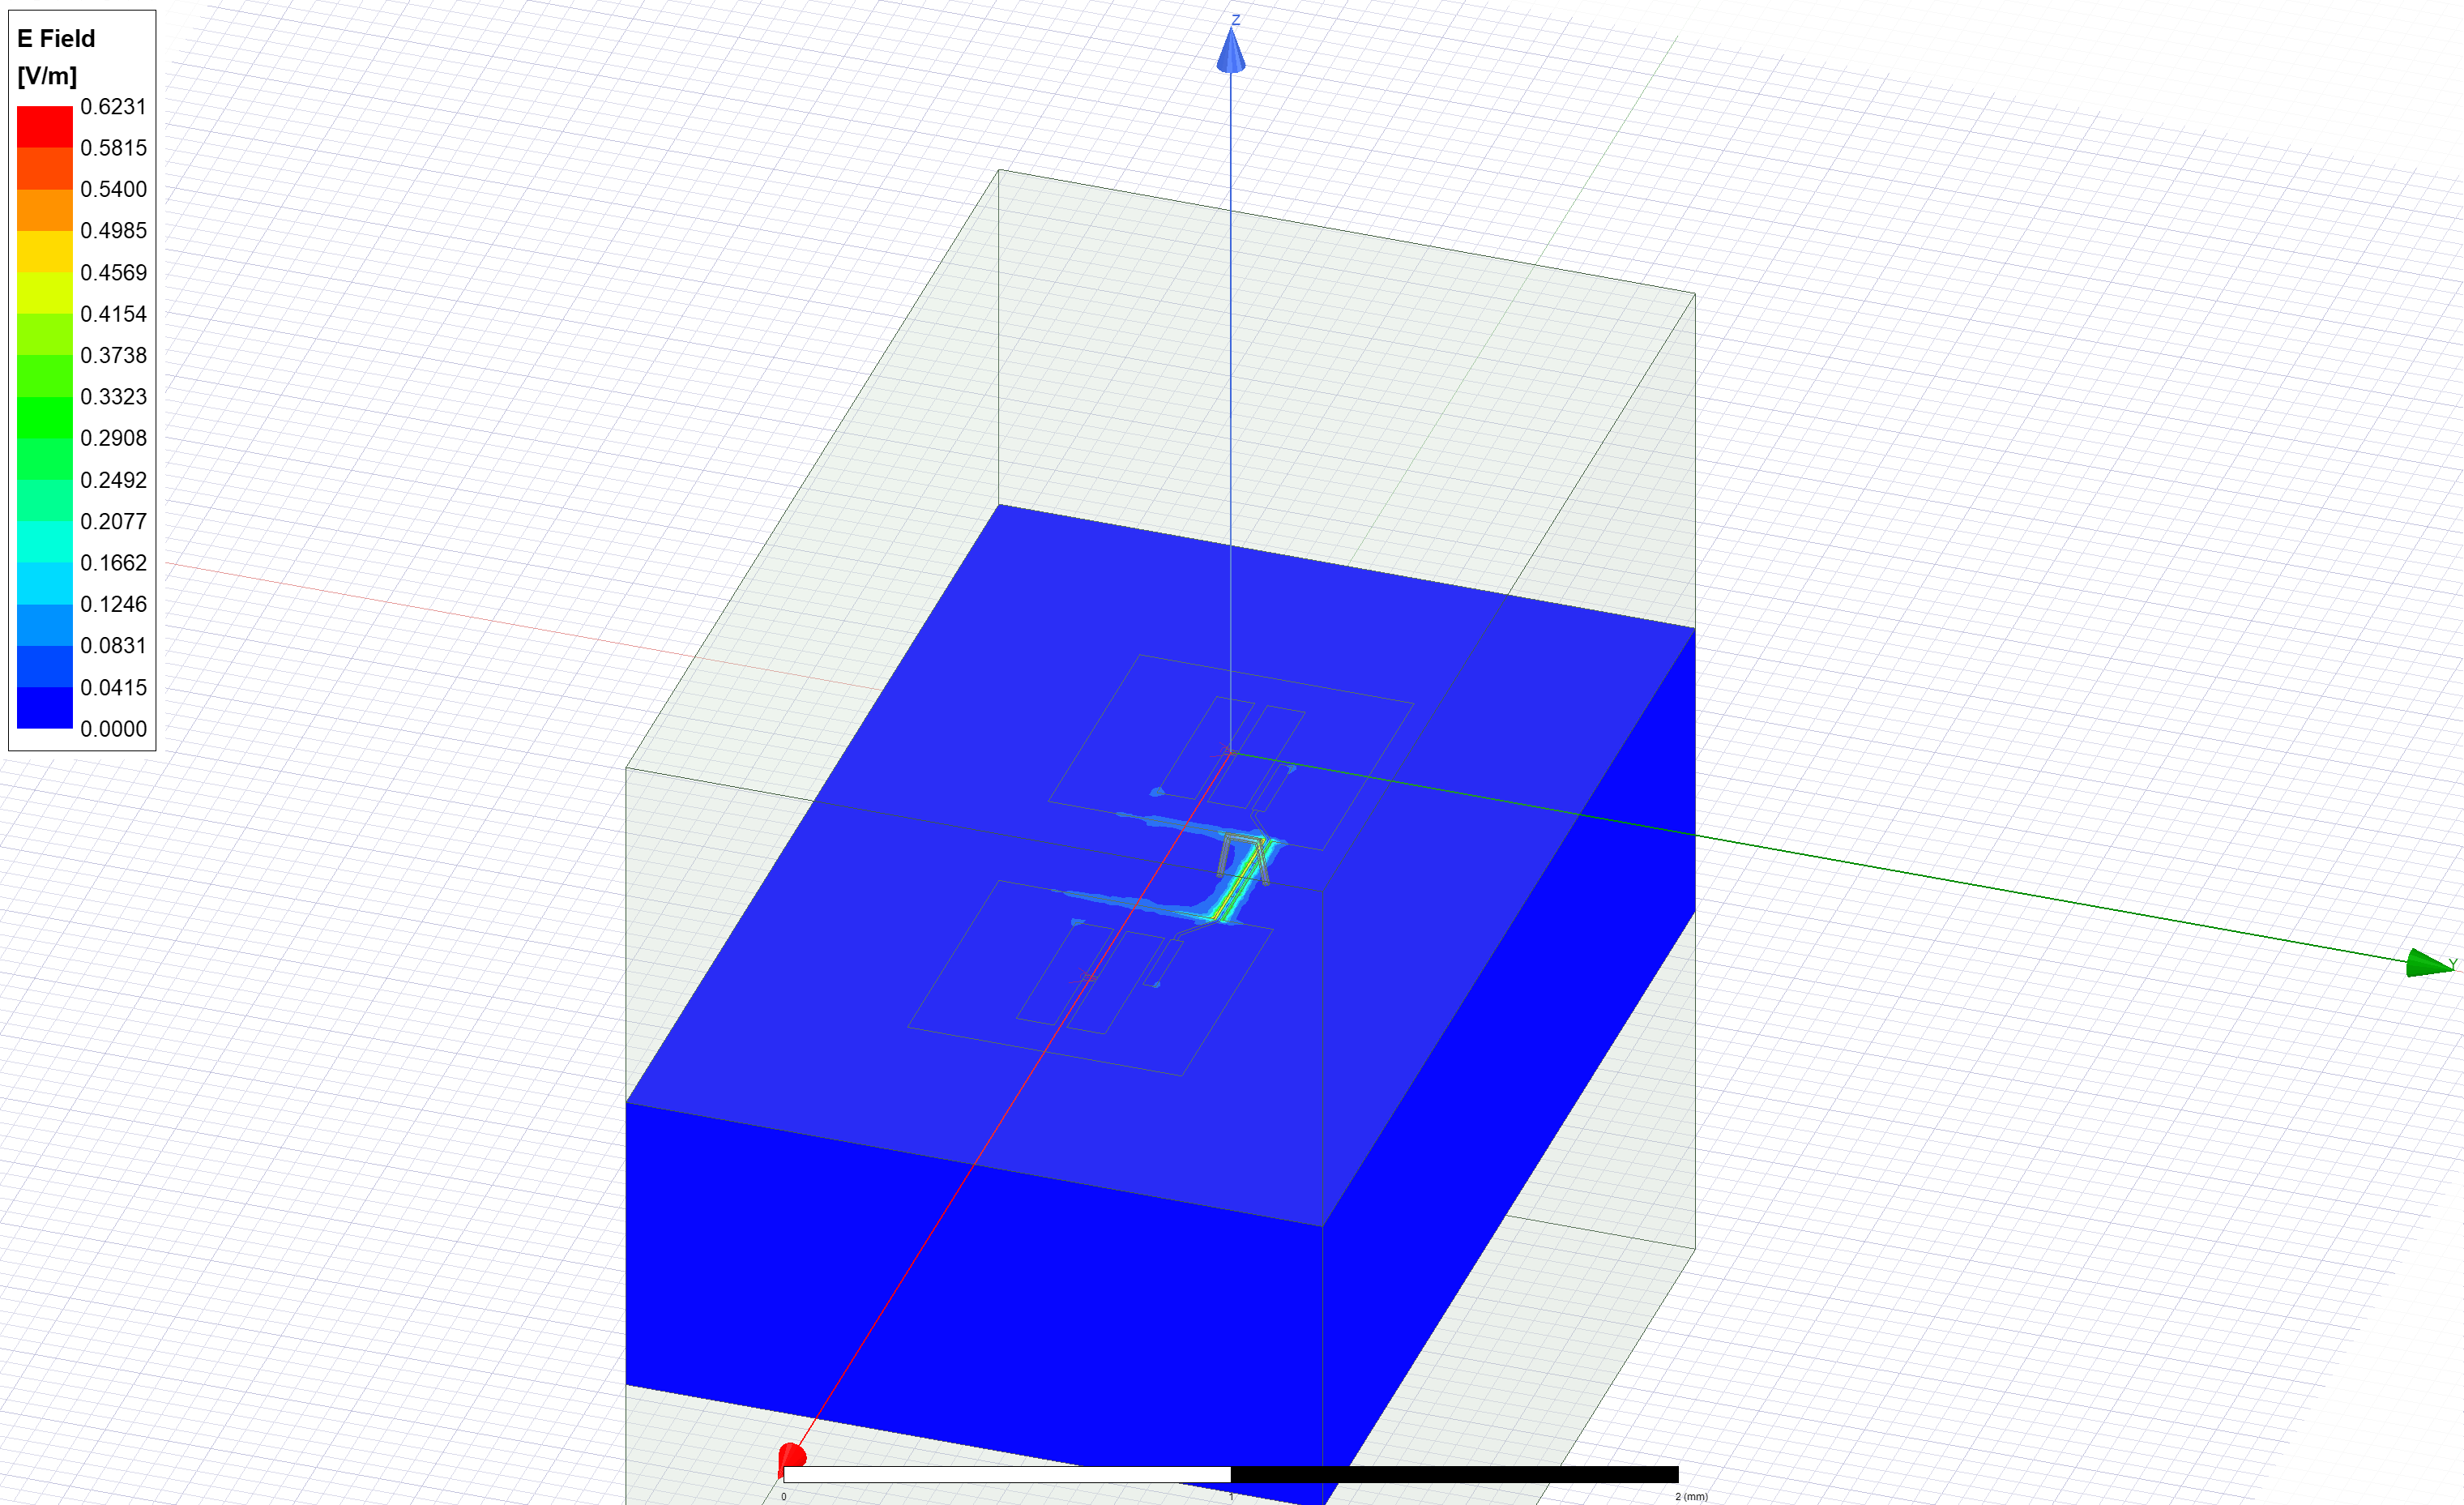

WindowsPath('C:/workspace/qiskit-metal/docs/tut/4 Analysis/ansys.png')

In [58]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

Delete the newly created E-field plot.

In [59]:
hfss.plot_ansys_delete(['Mag_E1'])

In [60]:
%metal_print Part 2. Energy-Participation-Ratio Analysis

Specify the junctions in the model; in this case there are 2 junctions, namely 'jj' and 'jj2'.

In [61]:
#Non-linear (Josephson) junction
pinfo.junctions['jj1'] = {'Lj_variable': 'Lj1',  'rect': 'JJ_rect_Lj_Q1_rect_jj', 
                             'line': 'JJ_Lj_Q1_rect_jj_',  'Cj_variable': 'Cj1'}
pinfo.junctions['jj2'] = {'Lj_variable': 'Lj2',  'rect': 'JJ_rect_Lj_Q2_rect_jj', 
                             'line': 'JJ_Lj_Q2_rect_jj_',  'Cj_variable': 'Cj2'}
pinfo.validate_junction_info() # Check that valid names of variables and objects have been supplied
pinfo.dissipative['dielectrics_bulk'] = ['main'] # Dissipative elements: specify
# Handles  microwave analysis on eigenmode solutions
eprd = epr.DistributedAnalysis(pinfo)

Design "TwoTransmon" info:
	# eigenmodes    2
	# variations    1


Find the electric and magnetic energy stored in the substrate and the system as a whole.

In [62]:
ℰ_elec = eprd.calc_energy_electric()
ℰ_elec_substrate = eprd.calc_energy_electric(None, 'main')
ℰ_mag = eprd.calc_energy_magnetic()

print(f"""
ℰ_elec_all       = {ℰ_elec}
ℰ_elec_substrate = {ℰ_elec_substrate}
EPR of substrate = {ℰ_elec_substrate / ℰ_elec * 100 :.1f}%

ℰ_mag_all       = {ℰ_mag}
ℰ_mag % of ℰ_elec_all  = {ℰ_mag / ℰ_elec * 100 :.1f}%
""")


ℰ_elec_all       = 1.84888005349645e-23
ℰ_elec_substrate = 1.77335214801914e-23
EPR of substrate = 95.9%

ℰ_mag_all       = 1.84887995285919e-23
ℰ_mag % of ℰ_elec_all  = 100.0%



Perform EPR analysis for all modes and variations.

In [63]:
eprd.do_EPR_analysis()

# 4a. Perform Hamiltonian spectrum post-analysis, building on mw solutions using EPR
epra = epr.QuantumAnalysis(eprd.data_filename)
epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 7)

# 4b. Report solved results
swp_variable = 'Lj1' # suppose we swept an optimetric analysis vs. inductance Lj_alice
epra.plot_hamiltonian_results(swp_variable=swp_variable)
epra.report_results(swp_variable=swp_variable, numeric=True)


Variation 0  [1/1]

  Mode 0 at 36.39 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.0%  9.244e-24 9.244e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 42.39%
	jj1             7.51847e-17  (+)        1.02197e-16
		Energy fraction (Lj over Lj&Cj)= 51.52%
	jj2             1.19316e-16  (+)        1.12281e-16
		(U_tot_cap-U_tot_ind)/mean=0.00%
Calculating Qdielectric_main for mode 0 (0/1)
p_dielectric_main_0 = 0.9591493751395729

  Mode 1 at 40.89 GHz   [2/2]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               -0.0%   8.29e-24  8.29e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 36.81%
	jj1    

WARNING 01:23PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project16\TwoTransmon\2021-06-28 13-23-21.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.399262e+08
1    3.884274e+09
dtype: float64

Pm_norm idx =
     jj1    jj2
0  False  False
1  False  False
*** P (participation matrix, not normlz.)
            jj1           jj2
0  7.518470e-17  1.193159e-16
1  7.088394e-17  8.997059e-17

*** S (sign-bit matrix)
   s_jj1  s_jj2
0      1      1
1      1      1
*** P (participation matrix, normalized.)
   7.5e-17  1.2e-16
   7.1e-17    9e-17

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
  2.04e-28 3.78e-28
  3.78e-28 1.77e-28

*** Chi matrix ND (MHz) 
        -0       -0
        -0       -0

*** Frequencies O1 PT (MHz)
0    36390.488640
1    40892.899892
dtype: float64

*** Frequencies ND (MHz)
0    3639

#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj1              13
eigenmode          
0          36390.49
1          40892.90

#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0    1
Lj1            
13  0 -0.0 -0.0
    1 -0.0 -0.0

In [64]:
for lj in range(12,16, 1):
    pinfo.design.set_variable('Lj1', f'{lj} nH')
    pinfo.setup.analyze()

INFO 01:23PM [analyze]: Analyzing setup Setup
INFO 01:24PM [analyze]: Analyzing setup Setup
INFO 01:24PM [analyze]: Analyzing setup Setup
INFO 01:25PM [analyze]: Analyzing setup Setup


Release Ansys's session

In [65]:
hfss.disconnect_ansys()

In [66]:
gui.main_window.close()

True